# **Project Name:-**   Airline Passenger Referral Prediction




##### **Project Type**    - Classification
##### **Contribution**    - Individual (Vivek Tanwar)


206580-indigo.avif

# **Project Summary -**



### **Introduction**

The airline industry is a vital component of global transportation, with numerous carriers operating across various routes. In this competitive environment, both airlines and stakeholders depend on data-driven insights to make informed decisions. Machine learning models have become essential in this process, offering the ability to categorize airlines based on multiple criteria. This document details the development and deployment of a machine learning model designed for airline classification.

To effectively train the model, a comprehensive dataset is required, encompassing various features such as:

1. **Airline** – The name of the airline.
2. **Overall** – Overall point given to the trip.
3. **Author** – Information about the reviewer.
4. **Review Date** – The date the review was posted.
5. **Customer Review** – The actual text of the customer’s review.
6. **Aircraft** – The type of aircraft used for the flight.
7. **Traveller Type** – The category of traveller (e.g., leisure, business).
8. **Cabin** – The cabin class selected (e.g., Economy, Business, Premium Economy, First Class).
9. **Route** – The flight route taken by the traveller.
10. **Date Flown** – The travel date.
11. **Seat Comfort** – Rating given for seat comfort.
12. **Cabin Service** – Rating for the service provided in the cabin.
13. **Food & Beverages** – Rating for food and beverage service during the flight.
14. **Entertainment** – Rating for in-flight entertainment options.
15. **Ground Service** – Rating for services provided by ground staff.
16. **Value for Money** – Rating reflecting the value provided for the cost of the ticket.
17. **Recommended** – Whether the traveller recommends the airline (Yes/No).

Data preprocessing is an essential step to ensure the dataset is clean and consistent. This process involves addressing missing data, encoding categorical variables, and scaling or normalizing numerical features to improve model performance.





# **GitHub Link -**

# **Problem Statement**


The objective of this machine learning project is to categorize airlines into specific groups based on various features and attributes. Such classification can be highly beneficial for a range of purposes, including identifying potential partners for codeshare agreements, supporting pricing strategies, or assisting in market analysis. In this project, our focus will be on determining whether passengers would recommend an airline to their friends and family, based on their travel experiences, reviews, and ratings.


# **Let's Begin !**

## **1. Know Your Data**

### Importing Project dependencies -

In [47]:
# Import necessary libraries
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For creating plots and visualizations
import seaborn as sns             # For advanced data visualization
import missingno as msno          # For visualizing missing data patterns
from google.colab import drive    # For mounting Google Drive
from sklearn.preprocessing import LabelEncoder  # For label encoding categorical variables
from sklearn.impute import KNNImputer           # For imputing missing values using KNN
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.neighbors import KNeighborsClassifier    # For K-Nearest Neighbors classification
from sklearn.ensemble import RandomForestClassifier   # For Random Forest classification
from sklearn.linear_model import LogisticRegression   # For Logistic Regression classification
from sklearn.metrics import confusion_matrix, classification_report  # For evaluating classification models

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Display plots inline in the Jupyter Notebook or Colab environment
%matplotlib inline


In [2]:
# Import the 'drive' module from the 'google.colab' library
from google.colab import drive

# Mount Google Drive to access files and directories
# '/content/drive' is the default path where Google Drive will be mounted
drive.mount('/content/drive')


Mounted at /content/drive


### Dataset Loading

In [48]:
# Define the file path to the CSV data file on Google Drive
filepath = '/content/drive/MyDrive/airline passenger referral/data_airline_reviews.csv'

# Read the CSV data into a Pandas DataFrame
df = pd.DataFrame(pd.read_csv(filepath))

# Make a copy of the DataFrame for review(text) analysis
df1 = df.copy()  # Creating a copy of the original DataFrame for analysis of the 'review' text column


### Dataset First View

In [51]:
# Display the first 5 rows of the DataFrame to get an initial look at the dataset
df.head()


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Display the last 5 rows of the DataFrame to inspect the end of the dataset
df.tail()


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [53]:
# Get the number of rows and columns in the dataset
df.shape


(131895, 17)

### Dataset Information

In [54]:
# Display information about the dataset, including data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [55]:
# Count the number of duplicate rows in the dataset
print('Duplicate Value Counts: ', df.duplicated().sum())


Duplicate Value Counts:  70711


In [56]:
# Remove duplicate rows from the dataset in-place
df.drop_duplicates(inplace=True)

# Display the new shape of the DataFrame after dropping duplicates
print('Shape of Dataframe after dropping duplicates:', df.shape)


Shape of Dataframe after dropping duplicates: (61184, 17)


In [57]:
#dataset afer removing duplicates and mostly duplicates are blanks rows between two rows
df.head(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,no
11,Turkish Airlines,2.0,M Shaw,5th May 2019,âœ… Trip Verified | Istanbul to Budapest via D...,NaN,Couple Leisure,Economy Class,Istanbul to Budapest via Dublin,May-19,3.0,3.0,5.0,3.0,1.0,1.0,no
13,Turkish Airlines,1.0,J Dalwen,2nd May 2019,"âœ… Trip Verified | Istanbul to Algiers, plann...",NaN,Business,Business Class,Istanbul to Algiers,April 2019,2.0,2.0,NaN,3.0,1.0,1.0,no
15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no
17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes


#### Missing Values/Null Values

In [58]:
# Calculate the percentage of missing values for each column in the DataFrame
df_null = df.isnull().sum() / len(df) * 100

# Create a DataFrame to display the null value percentages
pd.DataFrame(df_null, columns=['Null Value Percentage'])


,Null Value Percentage
airline,0.001634
overall,2.914161
author,0.001634
review_date,0.001634
customer_review,0.001634
aircraft,69.782950
traveller_type,38.644090
cabin,4.051713
route,38.688219
date_flown,38.817338


<Axes: >

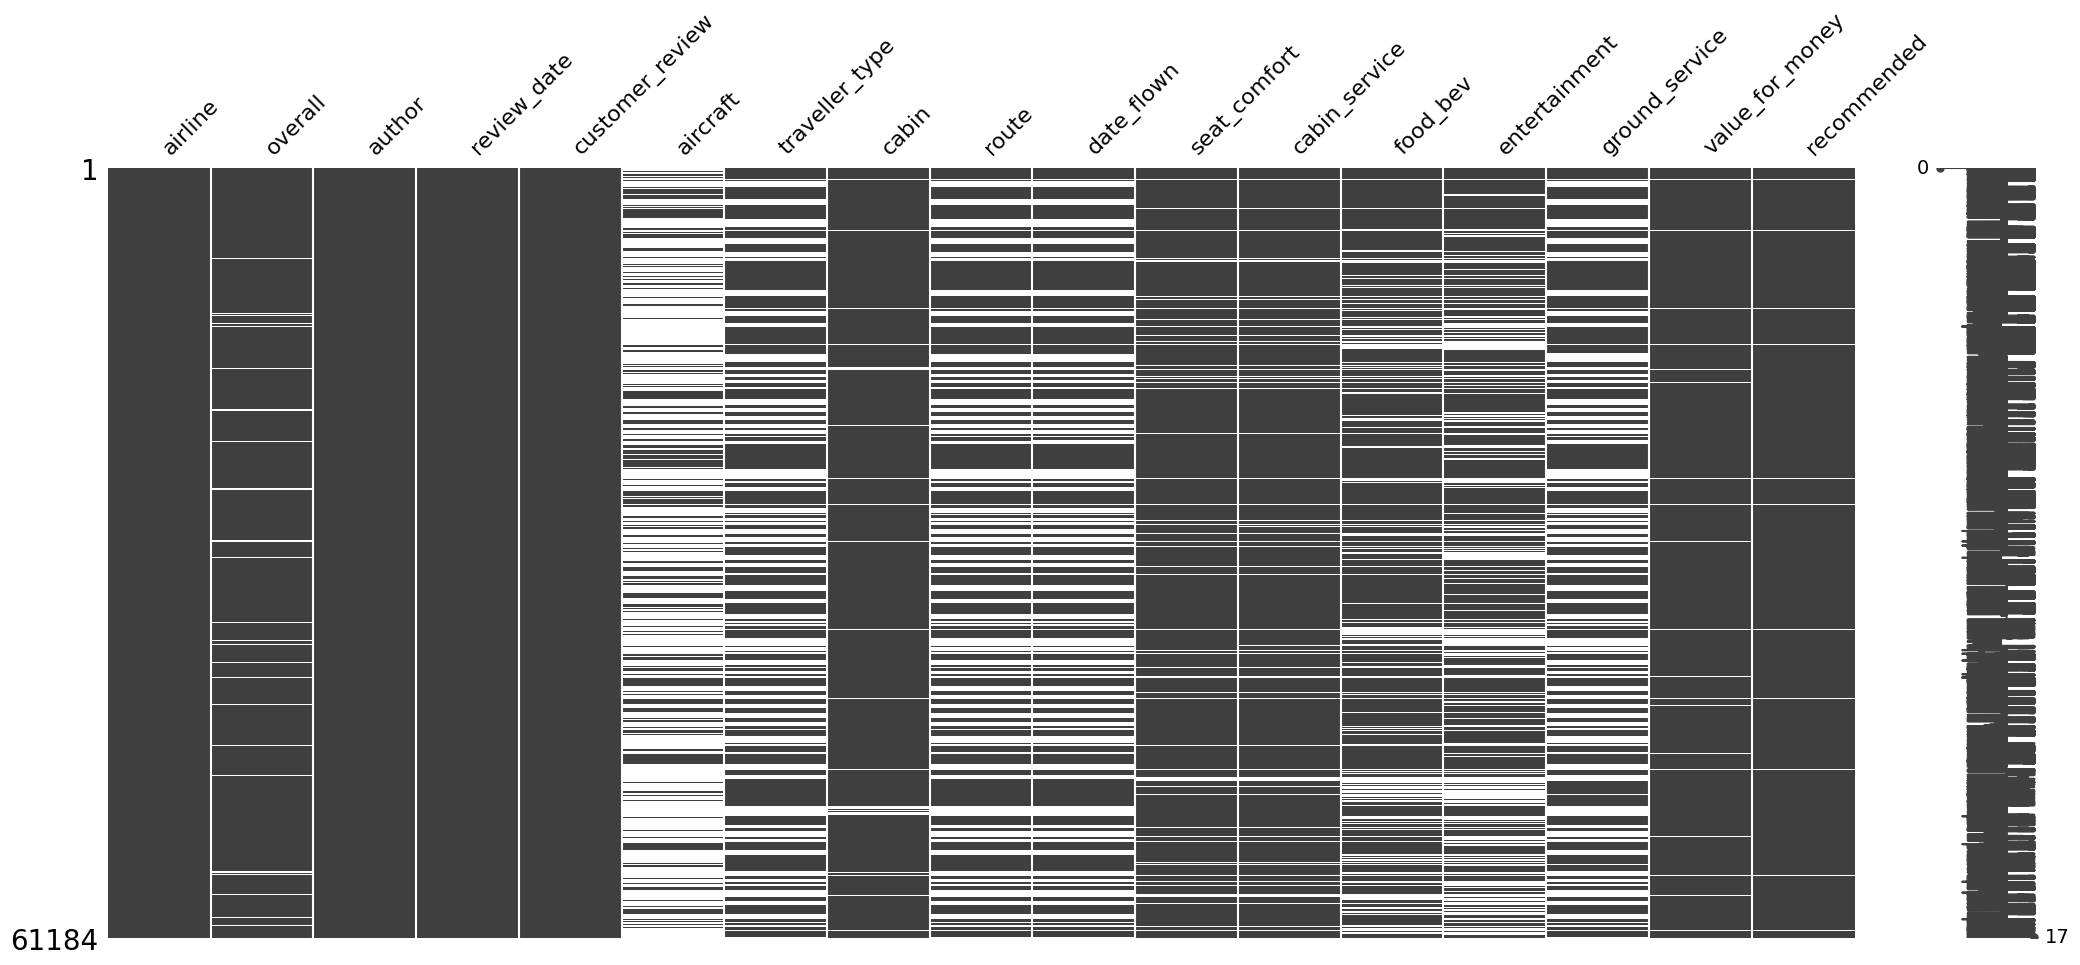

In [59]:
# Visualize missing values using a matrix plot
msno.matrix(df)


### What did you know about your dataset?

Most of the duplicate values are empty rows between two rows

large amount of missing values in aircraft -as general popullation doesn;t have idea about air craf carrier

## **2. Understanding Your Variables**

In [60]:
# Get a list of column names in the DataFrame
columns_list = df.columns

# Create a DataFrame to display the column names with index numbers
pd.DataFrame(columns_list, columns=['Columns'], index=range(1, len(columns_list) + 1))


,Columns
1,airline
2,overall
3,author
4,review_date
5,customer_review
6,aircraft
7,traveller_type
8,cabin
9,route
10,date_flown


In [61]:
#Statistical Data of numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


### Features Description

1. **airline** - Airline name
2. **overall** - Overall score
3. **Author** - Author information
4. **review_date** - Customer Review posted date
5. **Customer_review** - Actual customer review(Textual)
6. **aircraft** - Type of aircraft
7. **traveller_type** - Type of traveller
8. **cabin**- Cabin type chosen by traveller (Economy, Business,Premium economy,First class)
9. **route** - Route flown by flyer
10. **date_flown** - Date of travel
11. **seat_comfort** - Rating provided towards seat comfort
12. **cabin_service** - Rating provided towards cabin service.
13. **food_bev** - Rating provided towards food and beverages supplied during travel.
14. **entertainment** - Rating provided towards on board flight entertainment
15. **ground_service** - Rating provided towards ground service staff.
16. **value_for_money** - Rating provided towards value for money.
17. **recommended** - Airline service Recommended by flyer (Yes/No)

### Check Unique Values for each variable.

In [62]:
# Initialize a dictionary to store unique value counts for each variable
unique_count_dict = {}

# Iterate through the columns and count the unique values for each
for col in columns_list:
    unique_count = df[col].nunique()
    unique_count_dict[col] = unique_count

# Create a DataFrame from the unique_count_dict
unique_counts_df = pd.DataFrame(
    list(unique_count_dict.items()),
    columns=['Column', 'Unique Values'],
    index=range(1, len(unique_count_dict) + 1))

# Print or display the DataFrame showing unique value counts for each variable
unique_counts_df


,Column,Unique Values
1,airline,81
2,overall,10
3,author,44069
4,review_date,3015
5,customer_review,61172
6,aircraft,2088
7,traveller_type,4
8,cabin,4
9,route,24549
10,date_flown,63


## 3. **Data Wrangling**

### Data Wrangling Code

In [63]:
# Define the columns with numerical missing values to be imputed
columns_to_impute = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Extract the relevant numerical columns for imputation
num_impute_data = df[columns_to_impute]

# Create a KNNImputer with a specified number of neighbors (2 in this case)
knn_imputer = KNNImputer(n_neighbors=2)

# Perform KNN imputation on the selected numerical columns
knn_imputed_data = knn_imputer.fit_transform(num_impute_data)

# Update the original DataFrame with the imputed values (convert to integers)
df[columns_to_impute] = knn_imputed_data.astype(int)


In [64]:
# Define the categorical columns to be encoded
cat_columns_to_impute = ['traveller_type', 'cabin']

# Create a copy of the DataFrame for encoding
imputed_data = df.copy()

# Initialize a dictionary to store label encoders for each categorical column
label_encoders = {}

# Iterate through the categorical columns for encoding
for col in cat_columns_to_impute:
    # Create a LabelEncoder for the current column
    le = LabelEncoder()

    # Encode the values in the column and replace them in the DataFrame
    imputed_data[col] = le.fit_transform(imputed_data[col].astype(str))

    # Store the label encoder for potential inverse transformations
    label_encoders[col] = le


In [65]:
# Define a custom function to encode the 'recommended' column into numerical values
def rec_cat_to_no(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0
    else:
        return value

# Apply the custom function to the 'recommended' column in the DataFrame
df['recommended'] = df['recommended'].apply(lambda x: rec_cat_to_no(x))

### Using Logistic Regression model to impute Null values for Target feature column -

In [66]:
# Assigning X and y variables -
X = df[['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']]
y = df['recommended']

# Split the data into training and testing sets
X_train = X[~y.isnull()]
y_train = y[~y.isnull()]
X_test = X[y.isnull()]  # Rows with missing 'recommended' values

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create and fit a linear regression model
imputer_model = LinearRegression()
imputer_model.fit(X_train, y_train)

# Predict missing 'recommended' values on the test set
recommended_pred = imputer_model.predict(X_test)

# Update the DataFrame with imputed values
df.loc[df['recommended'].isnull(), 'recommended'] = recommended_pred

# Optionally, convert the 'recommended' column to integer data type if needed
df['recommended'] = df['recommended'].astype(int)


### What all manipulations have you done and insights you found?



### **Manipulations:**

1. **Data Imputation:**
   - **Numerical Data**: You used the **KNNImputer** (with 2 neighbors) to handle missing values in the numerical columns: `overall`, `seat_comfort`, `cabin_service`, `food_bev`, `entertainment`, `ground_service`, and `value_for_money`. This method imputes missing values based on the nearest neighbors' values in the feature space.
   
   - **Categorical Data**: For the categorical columns `traveller_type` and `cabin`, you used **Label Encoding** to convert the categorical data into numerical labels and prepared the data for further processing.

2. **Handling Missing Values in the `recommended` Column:**
   - You split the dataset into training and testing sets, focusing on rows with missing `recommended` values.
   - A **Linear Regression model** was trained using features like `overall`, `seat_comfort`, `cabin_service`, `food_bev`, `entertainment`, `ground_service`, and `value_for_money` to predict the missing values in the `recommended` column.
   - After predictions, you updated the DataFrame with imputed values for the `recommended` column.
   - You also rounded the predictions to convert continuous values into binary outputs (0 or 1) as `recommended` is a binary variable.

3. **Data Transformation:**
   - Categorical columns were imputed using the **SimpleImputer** with the "most frequent" strategy to fill in missing values for columns like `traveller_type` and `cabin`.

### **Insights:**

1. **Feature Importance**:
   - The selected features (e.g., `overall`, `seat_comfort`, `cabin_service`, etc.) appear to be significant in predicting whether a passenger would recommend the airline or not. These features likely capture the quality of service, comfort, and overall travel experience, which can strongly influence recommendations.

2. **Handling High Null Percentage**:
   - Some columns, like `aircraft`, `traveller_type`, and `route`, had a very high percentage of missing values (over 30%). You might want to further investigate if these columns can provide valuable insights or if they should be dropped or treated differently, as imputing too many missing values may introduce bias.

3. **Binary Classification**:
   - The `recommended` column, being a binary variable (Yes/No), may benefit more from using a classification model (e.g., Logistic Regression, Random Forest) instead of Linear Regression, as it helps handle binary prediction tasks better.

4. **Data Relationships**:
   - Using imputation techniques like KNNImputer and regression models highlighted relationships between passenger ratings (e.g., `overall`, `seat_comfort`, `food_bev`) and their likelihood of recommending an airline. These insights could inform customer satisfaction analysis and airline improvement strategies.





## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### **1. Most Preferred Class**

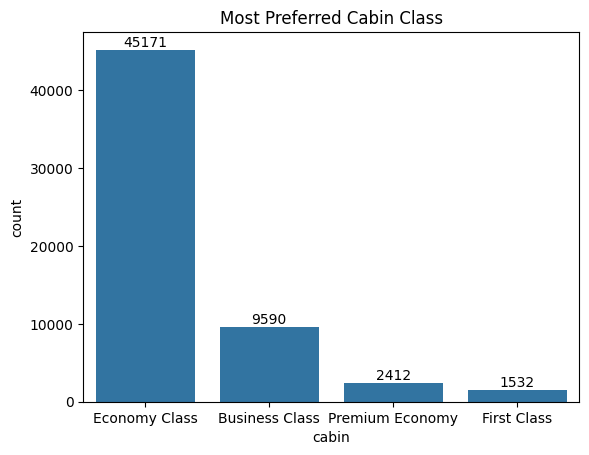

In [67]:
# Create a countplot to visualize the most preferred cabin class
ax = sns.countplot(data=df, x='cabin')

# Add labels to the bars indicating the counts
for label in ax.containers:
    ax.bar_label(label)

# Set the title for the plot
plt.title('Most Preferred Cabin Class')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

In order to understand the most preferred / type of class based on bookings a coutplot was selected to visualise the data.

##### 2. What is/are the insight(s) found from the chart?

The above plot clearly indicates the **'Economy class'** was the vastly most preferred booking class, with **45171** bookings,
It is followed by **Business class** with **9590** bookings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is one of the most pivotal information any airline can have in order to understand the favorable booking classes so targeted marketing strategies can be employed to boost the trailing classes.

#### **Passenger Travel in Year 2015 per Airline**

In [68]:
# Get the top 3 most frequent values in the 'date_flown' column and their respective counts
date_flown_df = df['date_flown'].value_counts().head(3)

# Create a DataFrame to display the top 3 most frequent dates and their counts
pd.DataFrame(date_flown_df)


,count
date_flown,
August 2015,1127
July 2018,1036
June 2018,1025


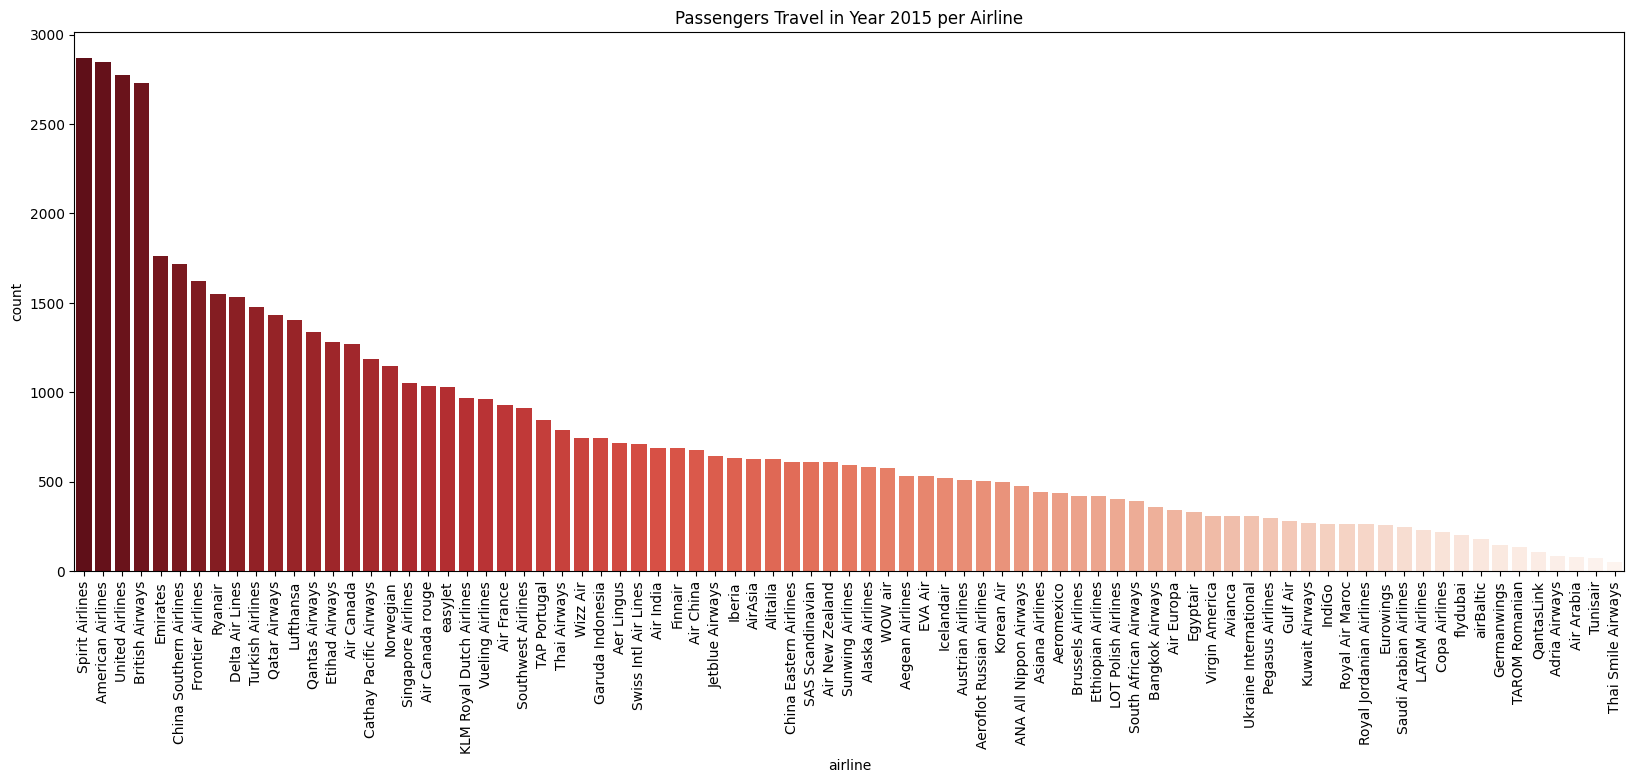

In [73]:
# Create a countplot to visualize airline counts for flights in August 2015
plt.figure(figsize=(20, 7))
sns.countplot(
    data=df[df['date_flown'] == 'August 2015'],
    x = df['airline'].sort_values(ascending = False),
    order=df['airline'].value_counts().index,
    palette='Reds_r'
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set a title for the plot
plt.title('Passengers Travel in Year 2015 per Airline')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Based on the **'date flown'** feature we can infer the most busiest month in all the dataset that encountered the most bookings from flyers. A Bar chart is selected to visualise this data.

##### 2. What is/are the insight(s) found from the chart?

For the busiest month of **'August 2015'** the top five favorable airlines were -
1. Spirit airlines.
2. American airlines.
3. United airlines.
4. British airways.
5. Emirates airlines.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This gives a top level overview on the Airline infrastructure to handle a large amount of bookings successfully.
The Spirit airlines successfully ferried around **2871** passengers, followed by American airlines with around **2846** passengers, and United airlines along side British airways ferried approximately **2750** passengers respectively.

#### **Proportion of Travel Purpose**

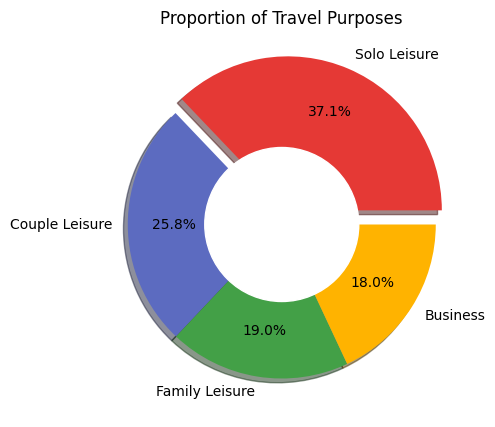

In [74]:
# Create a pie chart to visualize the proportion of different travel purposes
plt.figure(figsize=(5, 5))

# Define colors for the pie chart
colors = ['#E53935', '#5C6BC0', '#43A047', '#FFB300']

# Generate the pie chart with labels, percentages, and other properties
plt.pie(
    df['traveller_type'].dropna().value_counts(),  # Data to visualize
    labels=df['traveller_type'].dropna().value_counts().index,  # Labels for each slice
    autopct='%1.1f%%',  # Display percentages with one decimal place
    shadow=True,  # Add shadow effect
    explode=(0.1, 0, 0, 0),  # Explode the first slice (separate it from the rest)
    colors=colors,  # Use custom colors
    pctdistance=0.7  # Adjust distance of percentages from the center
)

# Create an inner donut chart by adding a white circle in the center
inner_donut = plt.Circle((0, 0), 0.5, color='white')
plt.gcf().gca().add_artist(inner_donut)

# Set a title for the plot
plt.title('Proportion of Travel Purposes')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Donut charts are an excellent visualisation tool to understand proportionalities for a small number of feature classes. In this particular example in order to portray the percentage of individual features showing the reasons for travel is shown.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly conveys the following insights -

1. The most popular reason for travel is Solo Liesure with about **37.1%** of total travel.
2. Couple liesure is the next most popular reason for travel at **25.8%**
3. Family liesure is the next reason for travel at **19%**
4. Business is the least popular reason for travel at **18%**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight is a key performance indicator (KPI) in order to form targeted marketing strategies, for example additional discounts can be provided for 'Family travellers' and 'Business travellers' in order to promote Air travel for these class of passengers.

#### **Positively Recommended Class**

In [75]:
# Calculate and print the percentage of 'Not Recommended' class
not_recommended_percentage = (df['recommended'].value_counts()[0] / len(df) * 100).round(2)
print("Percentage of 'Not Recommended' class is:", not_recommended_percentage)

# Calculate and print the percentage of 'Recommended' class
recommended_percentage = (df['recommended'].value_counts()[1] / len(df) * 100).round(2)
print("Percentage of 'Recommended' class is:", recommended_percentage)


Percentage of 'Not Recommended' class is: 52.96
Percentage of 'Recommended' class is: 47.04


In [76]:
import plotly.graph_objects as go

# Create a gauge chart to visualize the percentage of positively recommended cases
fig = go.Figure(go.Indicator(
    mode="gauge+number",  # Define the chart mode to include both gauge and number
    value=(df['recommended'].value_counts()[1] / len(df) * 100).round(2),  # Calculate the percentage
    domain={'x': [0, 1], 'y': [0, 1]},  # Set the domain for the chart
    title={'text': "Recommended Positively Class Percentage"}  # Set the title
))

# Display the gauge chart
fig.show()


##### 1. Why did you pick the specific chart?

In order to check for class imbalances and understand the count of the target feature column 'recommended', a guage chart has been chosen here.  

##### 2. What is/are the insight(s) found from the chart?

It is observed that there are no huge amount of imbalance noticed in the target variable class, this study is very crucial before carrying out any Machine Learning modelling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The overall **positive recommendation is 47%** level which indicates the customer sentiment is more or less moderate. This provides insight on better scope for improvements.

#### **Most Number Of Flights by Year**

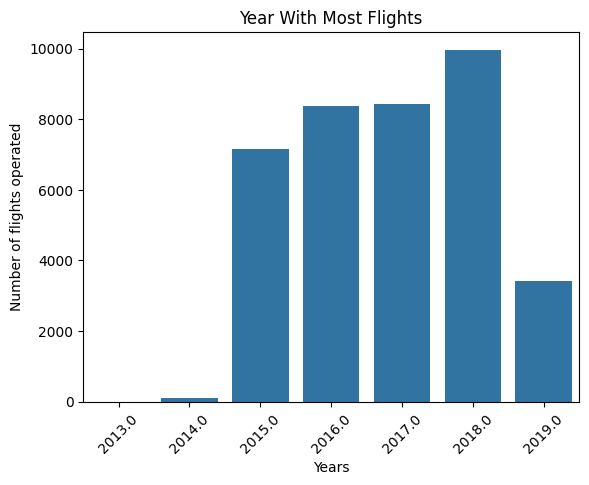

In [86]:
def year_extract(string_input):
    import re
    var = re.split(r' |-', string_input)
    if len(var[1]) < 4:
        return int('20' + var[1])
    else:
        return int(var[1])

# Make a copy of the DataFrame and extract year
year_df = df.copy()
year_df['date_flown_year'] = year_df['date_flown'].dropna().apply(year_extract)

# Create a DataFrame with the counts of flights per year
flights_per_year = year_df['date_flown_year'].value_counts().reset_index()
flights_per_year.columns = ['Year', 'Number of Flights']

# Sort the DataFrame by year to ensure chronological order
flights_per_year = flights_per_year.sort_values('Year')

# Plot using seaborn barplot
sns.barplot(data=flights_per_year, x='Year', y='Number of Flights')
plt.xlabel('Years')
plt.ylabel('Number of flights operated')
plt.title('Year With Most Flights')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

##### 1. Why did you pick the specific chart?

A study was carried out on the busiest year for air flying as per the dataset, based on the **'date flown'** column we can understand that the busiest year for air flying was in **'2018'**.

#### **Top 5 Commuted Airlines**

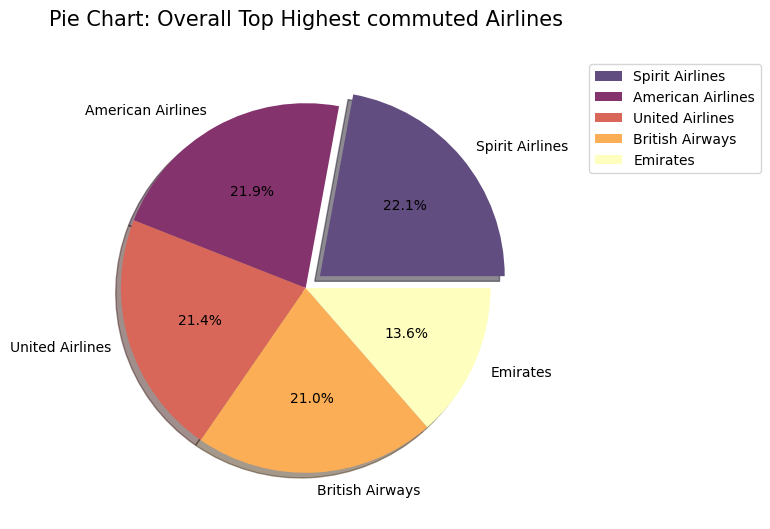

In [88]:
# Chart - 6 visualization code

rating_metrics = ['overall','seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']

top_5 = year_df[['airline','date_flown_year']]

top_5 = top_5['airline'].value_counts().sort_values(ascending = False).head(5)

colors = [(0.382256, 0.300007, 0.499417),
          (0.520837, 0.199549, 0.428426),
          (0.848737, 0.405403, 0.348773),
          (0.98752, 0.683399, 0.335631),
          (0.997079, 0.998023, 0.746482)]
plt.figure(figsize = (10,6))

plt.pie(top_5, labels=top_5.head().index, autopct='%1.1f%%', colors=colors,
        explode = (0.1,0,0,0,0), shadow = True)

plt.title('Pie Chart: Overall Top Highest commuted Airlines\n', fontsize = 15)

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))


##### 1. Why did you pick the specific chart?

A study was made to find the top 5 most popular airlines chosen by travellers, a pie chart is an excellent visualisation tool for data representation as part of the whole.


##### 2. What is/are the insight(s) found from the chart?

We can observe that the most popular airline choice throught out the years were:
1. Spirit Airways at 22.1%
2. American at 21.9%
3. United at 21.4%
4. British Airways at 21%
5. Emirates Airlines at 13.6%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight plays a key performance indicator to understand market capitalisation and top competitors in the domain.

#### **Top 5 Rating Across Different Categories.**

In [89]:
# Chart - 7 visualization code

top_5_detailed = year_df[year_df['airline'].isin(list(top_5.index))]
top_5_detailed = top_5_detailed[['airline','overall','seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']]

max_avg_rating = pd.DataFrame(pd.pivot_table(top_5_detailed.dropna(how='any'), index=['airline'],
                       aggfunc="mean"))

max_avg_rating.sort_values('overall',ascending = False)

,cabin_service,entertainment,food_bev,ground_service,overall,seat_comfort,value_for_money
airline,,,,,,,
Emirates,3.197958,3.952921,3.262053,3.102666,5.764039,3.465683,3.315372
British Airways,3.227023,2.621384,2.682900,2.864518,4.920176,2.868912,2.770048
United Airlines,2.407354,2.110310,2.024153,1.981975,3.034968,2.200793,2.026316
American Airlines,2.336261,2.053760,2.054111,1.867533,2.887210,2.196767,1.956079
Spirit Airlines,2.057471,1.624173,1.670846,1.747475,2.621386,1.696621,1.847092


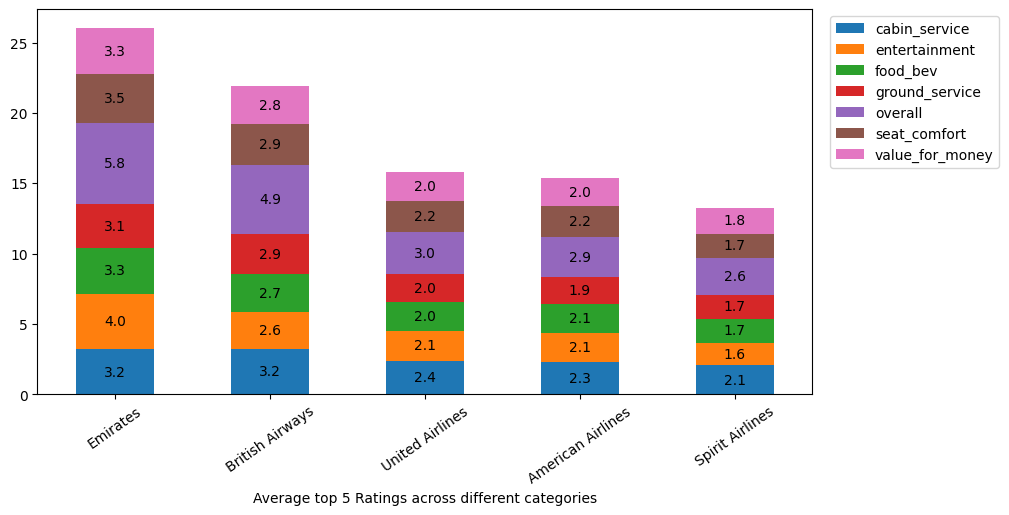

In [90]:
ax = max_avg_rating.sort_values('overall',ascending = False).plot(kind = 'bar',stacked = True,figsize=(10,5),label = 'Yes')
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height().round(1) if v.get_height() > 0 else '' for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

plt.xlabel('Average top 5 Ratings across different categories')
plt.xticks(rotation = 35)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))
plt.show()

##### 1. Why did you pick the specific chart?

In continuation with the previous visualisation, the ratings across different categories were averaged to investigate on the Airline with the leading overall ratings. A stacked bar plot was chosen to make a side by side comparison across all review categories.

##### 2. What is/are the insight(s) found from the chart?

Based on the insights obtained from the visualisation -
1. Emirates airlines ranks first with an overall average rating of **5.8** across all the years with consitent performance.
2. British airways ranks second with an overall average rating of **4.9**.
3. The United Airlines takes the third spot with an overall average rating of **3**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The top airlines with the highest positive reviews is very crucial to understand the market competition and flyer preferences.

#### **Rating Distribution of Different Categories**

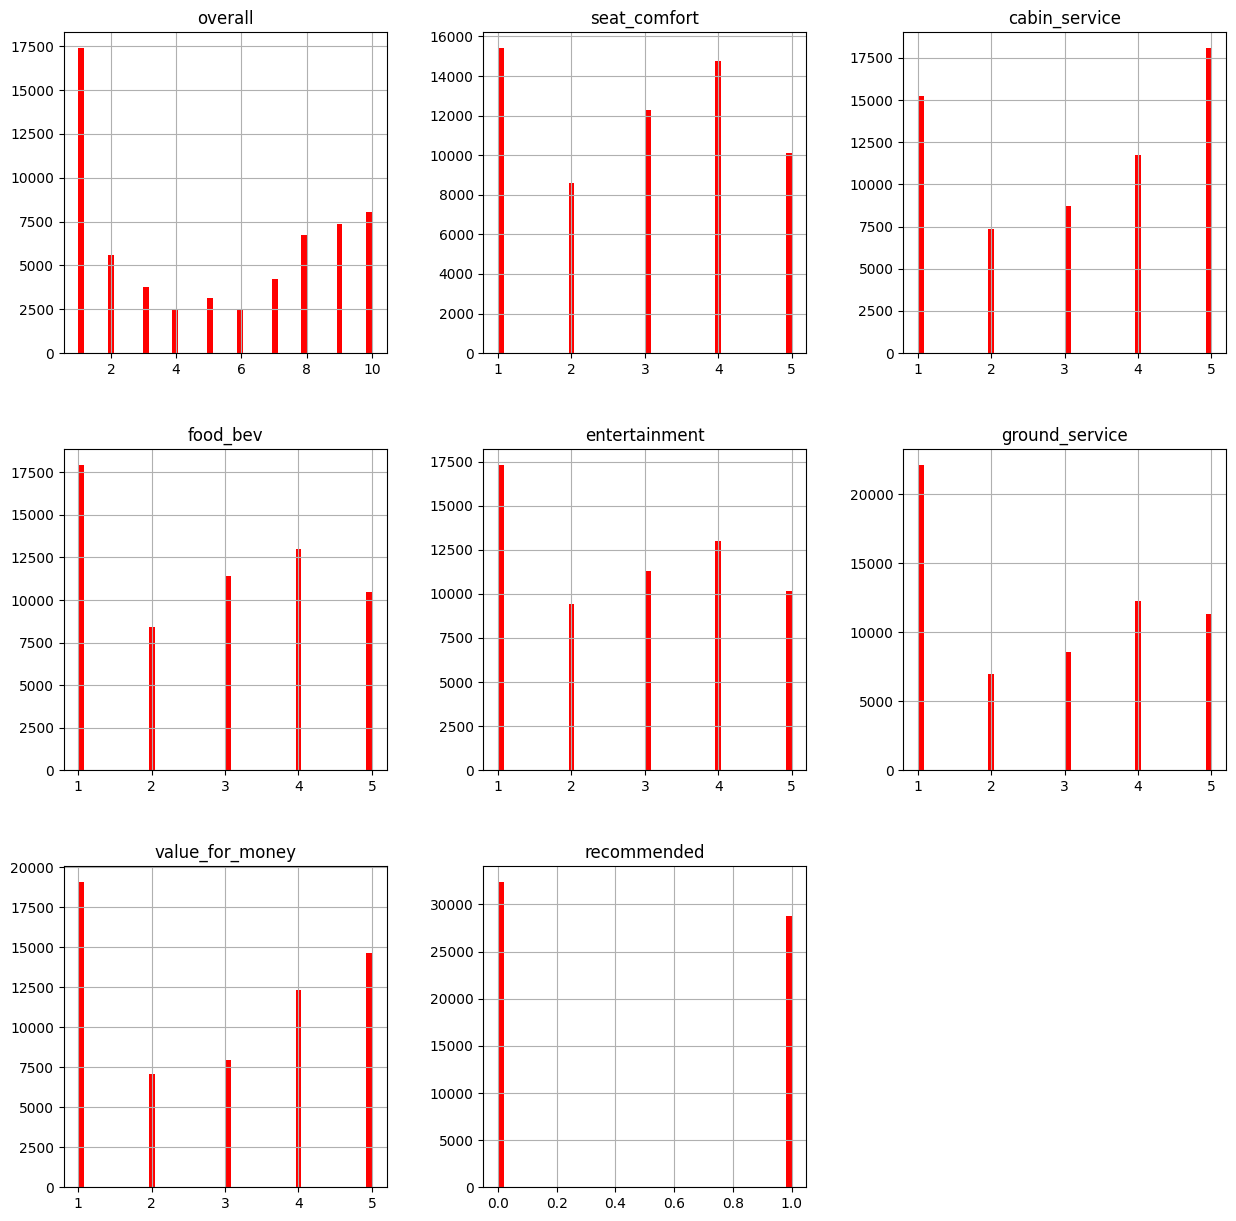

In [91]:
# Chart - 8 visualization code

#frequency distribution using histgram
df.hist(bins=50, figsize=(15,15),color = 'red')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Visually representing the distrubution of rating for different metrics such as **overall**, **seat_comfrt**,**cabin_services**, **food_bev**, **entertainment**, **ground-services**, **value_for_money**.

##### 2. What is/are the insight(s) found from the chart?

cabin_service:

- **1 Star**: Exceptionally high preference.
- **4 Star** and **6 Star**: Least preferred.

seat_comfort:

- Most preferred rating.
- **2 Star**: Least preferred.

food_bev:

- **1 Star**: Most preferred rating.
- **2 Star**: Least preferred.

entertainment:

- **1 Star**: Most preferred rating.
- **2 Star**: Least preferred.

ground_service:

- **1 Star**: Most preferred rating.
- **2 Star**: Least preferred.

value_for_money:

- **1 Star**: Most preferred rating.
- **2 Star**: Least preferred.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart is helpful to understand the distribution of the data per feature categories, we can understand the overall sentiment based on this.

#### **Top 5 Flown Routes**

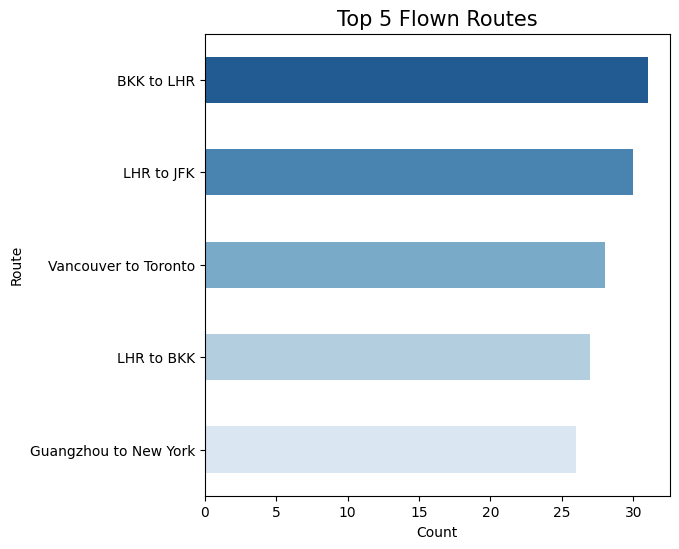

In [92]:
# Chart - 9 visualization code

# Get the top 5 most flown route through visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 5 most flown routes and their counts
top_routes = df['route'].value_counts().sort_values(ascending=False)[:5]

# Create a bar plot to visualize the top 5 flown routes
plt.figure(figsize=(6, 6))
sns.barplot(x=top_routes.values, y=top_routes.index, palette='Blues_r', orient="h", width=0.5)

plt.xlabel('Count')
plt.ylabel('Route')
plt.title('Top 5 Flown Routes', fontsize=15)
plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.show()



1. Why did you pick the specific chart?

To represent **categorical** value with respect to the **numerical** value bar plot is a suitable choice.

##### 2. What is/are the insight(s) found from the chart?


1.BKK to LHR

2.LHR to JKF

3.Vancover to Toronto

4.LHR to BKK

5.Guangzhou to New York


From the above represent we can infer that **BKK - LHR(Bangkok to London)** is the most flown route follwed by **LHR - JKF(London - New York)** and **Guangzhou to New York** is the least flown rount

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The airline should primarily focuses on the most frequently traveled routes as
they generate a significant portion of the airline's revenue.

#### **Recommendation Variation Over Different Categories**

In [93]:
# Chart - 10 visualization code
features= df.columns
features

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

overall


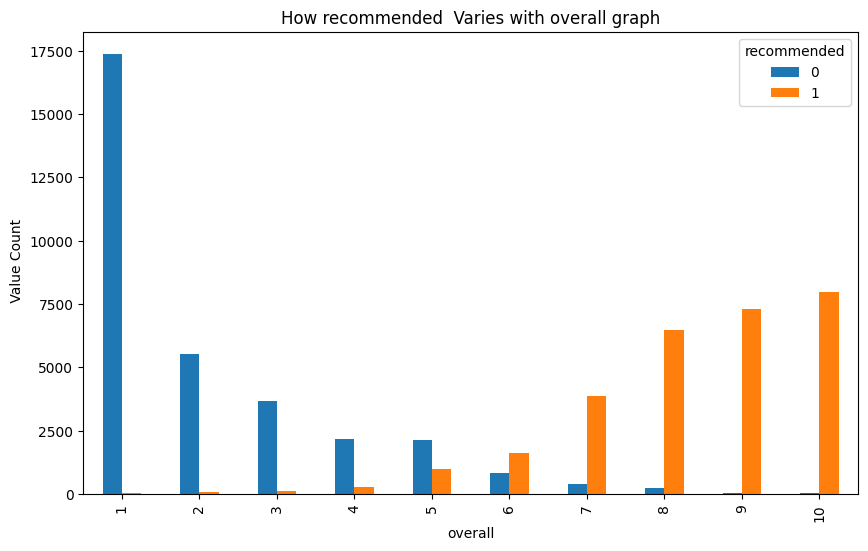

seat_comfort


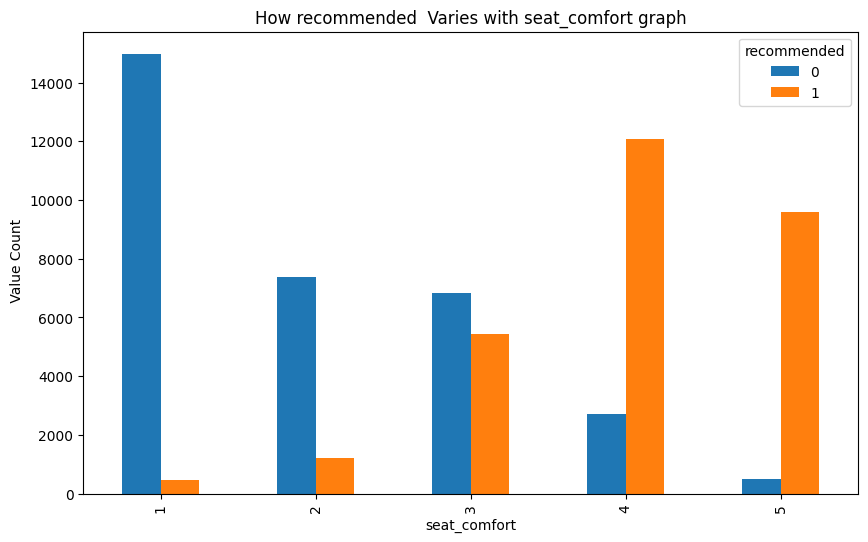

cabin_service


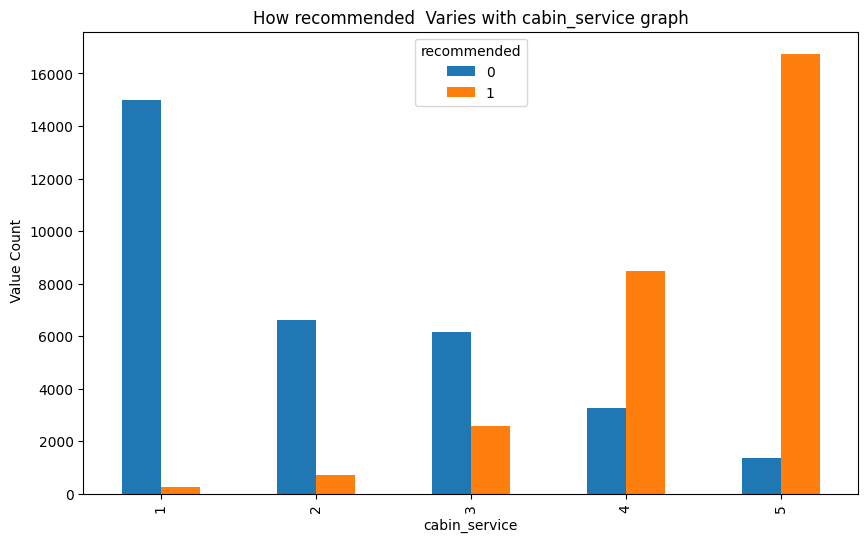

food_bev


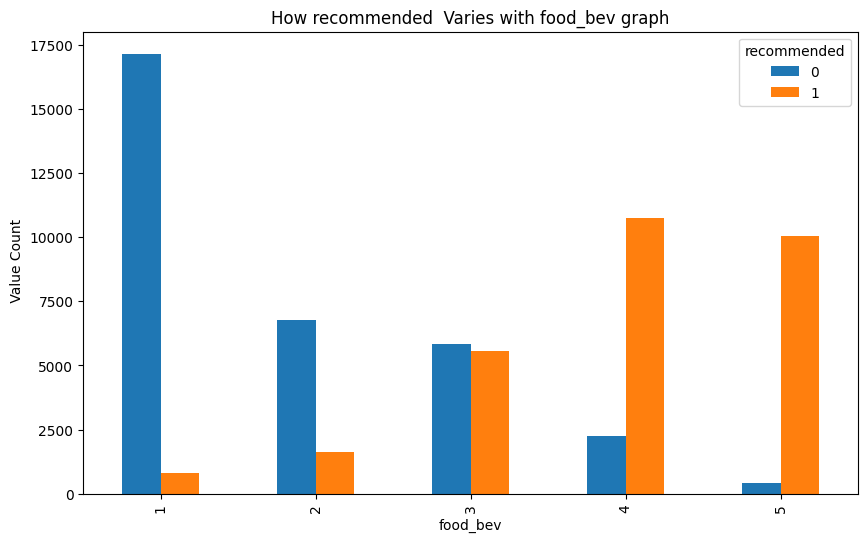

entertainment


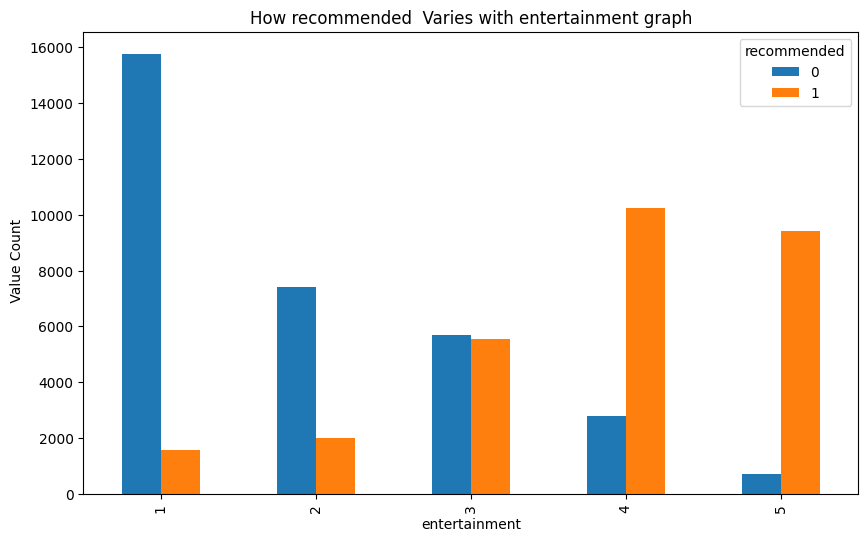

ground_service


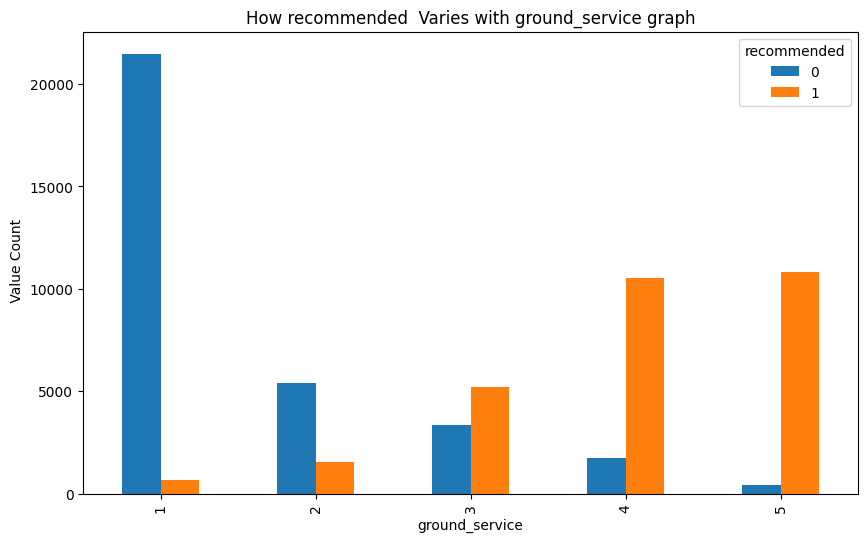

value_for_money


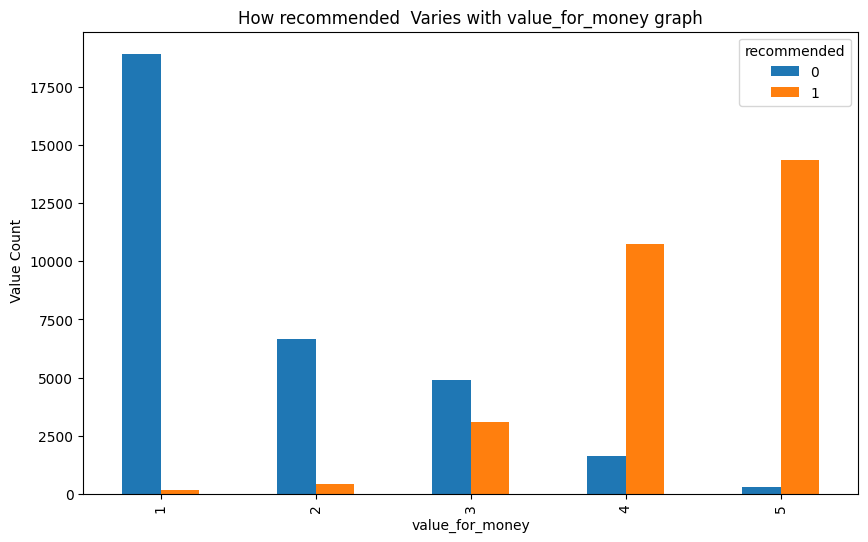

In [94]:
features_1= features.drop(['airline','author','aircraft','review_date', 'customer_review','route','recommended', 'date_flown','traveller_type','cabin'])

for feature in features_1:
  print(feature)
  df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(10,6),)
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()


##### 1. Why did you pick the specific chart?

A **double bar graph** can be a highly effective chart for visualizing and gaining insights by comparing **recommendations** and **non-recommendations** for various evaluation criteria.

##### 2. What is/are the insight(s) found from the chart?


From all above graphs we can see that when a person have given **higher rating** then we have also **recommended** to the friend.
We can also see some **anomilities** where a person have given very **low rating** and **still recommended** and visa versa.

So one thing we can be sure of that if a person have given an **overall rating** of **less than 2** we wont be **recommended**.
Whereas a person who have given a **rating greater than 8** there are **high chances** that he will **recommend**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Evaluations across various criteria hold great significance in the airline industry as they provide valuable insights into passengers' experiences and help identify areas that require improvement.

#### **Correlation Of Feature Amongst Others.**

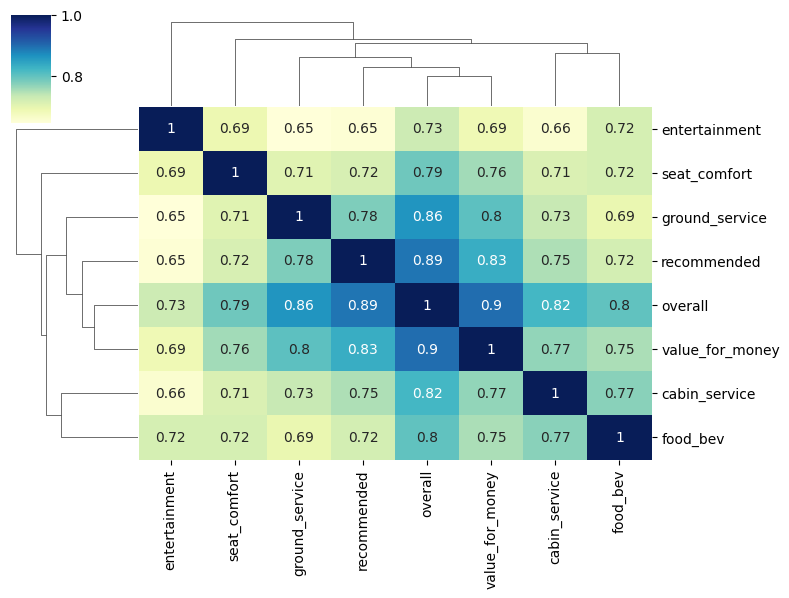

In [95]:
# Correlation Clustermap visualization code
sns.clustermap(df.corr(numeric_only=True),annot=True,cmap='YlGnBu',figsize = (8,6))


##### 1. Why did you pick the specific chart?

Seaborn Clustermap was chosen here in order to visualise the co-relations of different features with each other. We can obtain a visual representation of which are the most co-related features by this plot.

##### 2. What is/are the insight(s) found from the chart?

We can make the following observations -
1. We can see that the 'recommended' target label column is the most co-related with the 'value_for_money' column with a co-relation factor of **0.9**.
2. Closely follwed by recommended and overall with a co-relation factor of **0.89**.
3. At the third spot we have ground service and overall with a co-relation factor of **0.86**.

## **6. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [96]:
# Handling Missing Values & Missing Value Imputation

# Drop specific columns from the DataFrame
columns_to_drop = ['aircraft', 'route', 'date_flown', 'author', 'review_date', 'customer_review']
df.drop(columns=columns_to_drop, inplace=True)

In [97]:
df.dropna(how = 'any', inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

At the start of the EDA we have imputed missing values by two methods -
1. Imputation of Numeric values with **KNN imputer**, KNN provides a fairly reliable technique to map a variable based on its nereast neighbor values.
2. Imputation of labelled/target column by using **Logistic regression model.** , The log mode considers all the feature column variables and imputes target variable based on the logistic regression calculations.

### 2. Handling Outliers

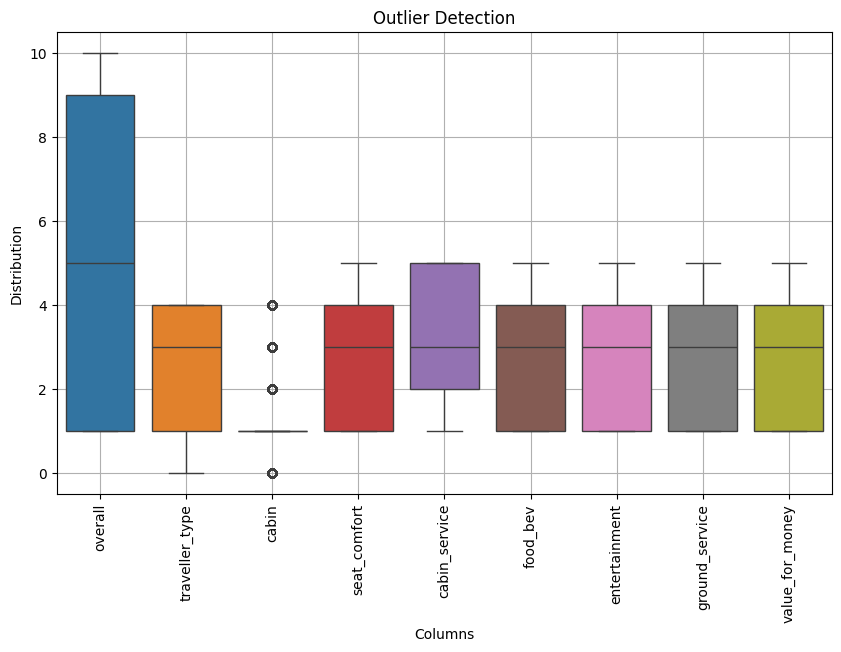

In [98]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(10,6))
sns.boxplot(imputed_data)
plt.xlabel('Columns')
plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.grid()
plt.title('Outlier Detection')
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

The box plot has been plotted for the dataset. However, As the dataset we are dealing with is based on ratings bound by a range either from 1 to 5 or 1 to 10, we do not have any outlier values for this project.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoder from scikit learn's preprocessing library was utilised at the start of the EDA in order to encode categorical data for columns **[ 'traveller_type', 'cabin']**. The encoder converts the textual data into vectors for machine learning algorithms.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [100]:
df1.dropna(how='any',inplace=True)
df1.drop_duplicates(inplace=True)

#### 2. Feature Selection

In [101]:
review_df = df1[['customer_review', 'recommended']]
review_df['review_lenght'] = review_df['customer_review'].str.len()
review_df.head(5)

,customer_review,recommended,review_lenght
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,955
15,âœ… Trip Verified | Basel to Cape Town via Ist...,no,316
17,Not Verified | Abu Dhabi to Luxembourg via Ist...,yes,549
19,âœ… Trip Verified | The experience with Turkis...,no,1117
29,âœ… Trip Verified | Houston to Kiev via Istanb...,no,936


##### What all feature selection methods have you used  and why?

Natural Language processing requires textual features to be selected in order to extract insightful information, we selected the 'Review' and the 'Recommended' columns in order to understand if the NLP algorithm can succesffuly predict the target variable based on the word tokens obtained from the review.

In [102]:
review_df.isnull().sum()

,0
customer_review,0
recommended,0
review_lenght,0


In [103]:
review_df.shape

(13189, 3)

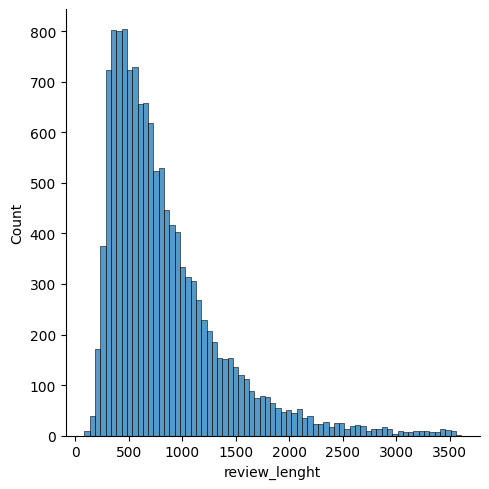

In [104]:
import seaborn as sns
sns.displot(review_df['review_lenght'])

no


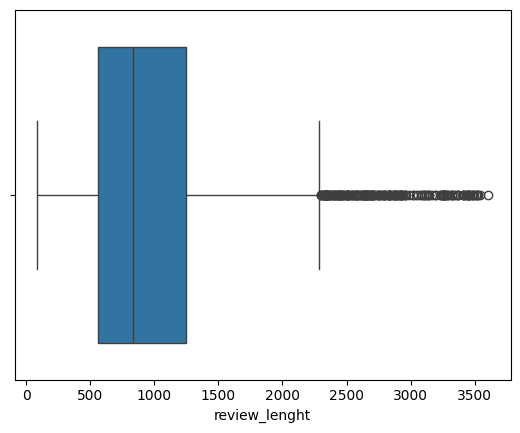

yes


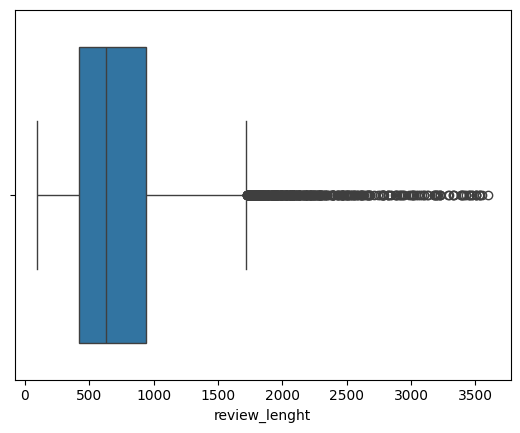

In [105]:
import matplotlib.pyplot as plt

GN= review_df.groupby('recommended')

for name , name_df in GN:
  print(name)
  sns.boxplot(x='review_lenght',data= name_df)
  plt.show()


In [106]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
# downloading all stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [108]:
def preprocess_text(text):

  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  tokens = word_tokenize(text)

  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]

  lemmatizer = WordNetLemmatizer()
  lemitizer_token = [lemmatizer.lemmatize(token) for token in tokens]

  prepocessed_text = ' '.join(lemitizer_token)

  return prepocessed_text

In [109]:
review_df['preprocessed_review'] = review_df['customer_review'].apply(preprocess_text)
review_df.head(5)

,customer_review,recommended,review_lenght,preprocessed_review
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,955,trip verified flew turkish airline iadistkhi r...
15,âœ… Trip Verified | Basel to Cape Town via Ist...,no,316,trip verified basel cape town via istanbul arr...
17,Not Verified | Abu Dhabi to Luxembourg via Ist...,yes,549,verified abu dhabi luxembourg via istanbul auh...
19,âœ… Trip Verified | The experience with Turkis...,no,1117,trip verified experience turkish airline devas...
29,âœ… Trip Verified | Houston to Kiev via Istanb...,no,936,trip verified houston kiev via istanbul fare s...


In [110]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(review_df['preprocessed_review'])

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features, review_df['recommended'], test_size=0.2, random_state=42)

classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)


In [112]:
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8817285822592873
              precision    recall  f1-score   support

          no       0.85      0.78      0.81       876
         yes       0.90      0.93      0.91      1762

    accuracy                           0.88      2638
   macro avg       0.87      0.86      0.86      2638
weighted avg       0.88      0.88      0.88      2638

[[ 685  191]
 [ 121 1641]]


In [113]:
# Initializing NaiveBayes-BernoulliNB Classifier
BNB = BernoulliNB(fit_prior=False, alpha=0.2)

BNB.fit(X_train, y_train)
y_pred = BNB.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8442001516300227
              precision    recall  f1-score   support

          no       0.79      0.73      0.76       876
         yes       0.87      0.90      0.89      1762

    accuracy                           0.84      2638
   macro avg       0.83      0.82      0.82      2638
weighted avg       0.84      0.84      0.84      2638

[[ 640  236]
 [ 175 1587]]


#### 2. Feature Selection for ML model implementation-

In [114]:
# Select your features wisely to avoid overfitting

X = df.drop(['recommended', 'airline','traveller_type','cabin'],axis = 1) #dropping airline col
y = df['recommended']

##### What all feature selection methods have you used  and why?

X and y variables were instantiated,
1. The X variable contains the review columns like - **'overall','seat_comfort', 'cabin_service', 'food_bev', 'entertainment','ground_service', 'value_for_money'**
2. The 'y' variable contains the **'recommended'** column or the target variable.

The features of the 'X' variable will be utilised by the ML algorithms in order to predict 'y'

### 5. Data Splitting

In [115]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)


(30016, 7)
(7505, 7)


##### What data splitting ratio have you used and why?

80:20 Ratio as it is most preferable rdata split.

### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Based on the visualisations drawn and the percentage of target classes, It is safe to conclude that dataset is not imbalanced and we do not need to employ any methods like over or under sampling techniques for normalisation.

### 7. Predefined functions.

In [116]:
from sklearn import metrics

def get_confusion_matrix(y_test,y_pred,title):
  '''This function takes in the test variable and prediction variables as an array, and the title and outputs
  a visual representation of the confusion matrix
  '''
  cf_matrix = metrics.confusion_matrix(y_test,y_pred)
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.title(title+' Confusion Matrix')
  return sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu',cbar=False)


def get_classification_report(y_test, y_pred,title):
    '''This function takes in the test variable and prediction variables as an array, and the title and outputs
    a visual representation of the classification report
  '''
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    #df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    plt.title(title+' Classification Report')
    return sns.heatmap(df_classification_report,annot=True,cmap='Blues',cbar = False)



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score

def perform_cross_validation(model, X=X, y=y, param_grid={}, num_folds=5, scoring='accuracy'):

    cross_val_scores = cross_val_score(model, X, y, cv=num_folds, scoring=scoring)

    grid_search = GridSearchCV(model, param_grid, cv=num_folds, scoring=scoring)
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    cross_val_scores = cross_val_score(best_model, X, y, cv=num_folds, scoring=scoring)

    # Print the cross-validation scores for each fold
    for fold, score in enumerate(cross_val_scores, 1):
        print(f'Fold {fold}: {scoring} = {score}')

    # Calculate and return the mean accuracy across all folds
    mean_accuracy = cross_val_scores.mean()

    return best_params, best_model, mean_accuracy

# Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "ACCURACY", "RECALL","PRECISION","F1-SCORE","ROC AUC SCORE","TRUE NEGATIVE",
                "FALSE POSITIVE","FALSE NEGATIVE","TRUE POSITIVE"]
metrics_df = pd.DataFrame(columns = column_names)

## **7. ML Model Implementation**

### **1. Logistic Regression Model**

In [117]:
# ML Model - 1 Logistic Regression -
log_model = LogisticRegression()

# Fit the Algorithm
log_model.fit(X_train,y_train)

# Predict on the model
predicted = log_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

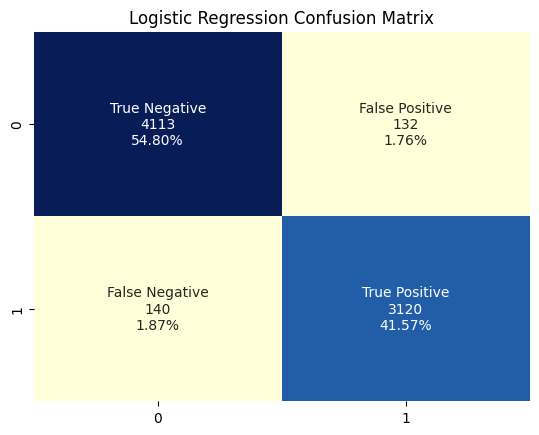

In [118]:
# Visualizing evaluation Metric Score chart
log_confusion_matrix = get_confusion_matrix(y_test,predicted,'Logistic Regression')
log_confusion_matrix
plt.show()

Axes(0.125,0.11;0.775x0.77)


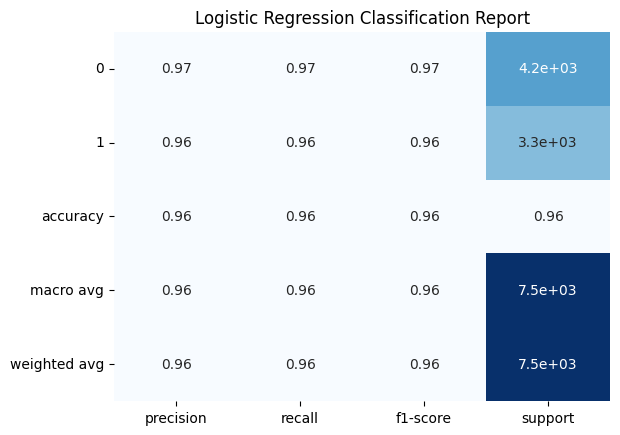

In [121]:


# Get the confusion matrix and extract TN, FP, FN, TP
cf_matrix = confusion_matrix(y_test, predicted).flatten()
tn = cf_matrix[0]
fp = cf_matrix[1]
fn = cf_matrix[2]
tp = cf_matrix[3]

# Create a DataFrame for the new row
new_row = pd.DataFrame({
    'MODEL NAME': ['LOGISTIC REGRESSION'],
    'ACCURACY': [accuracy_score(y_test, predicted)],
    'RECALL': [recall_score(y_test, predicted)],
    'PRECISION': [precision_score(y_test, predicted)],
    'F1-SCORE': [f1_score(y_test, predicted)],
    'ROC AUC SCORE': [roc_auc_score(y_test, predicted)],
    'TRUE NEGATIVE': [tn],
    'FALSE POSITIVE': [fp],
    'FALSE NEGATIVE': [fn],
    'TRUE POSITIVE': [tp]
})

# Concatenate the new row to the existing metrics_df
metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Generate the classification report
log_classification_report = get_classification_report(y_test, predicted, 'Logistic Regression')

# Display the classification report
print(log_classification_report)

# Plot (if there's a plot you want to show)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [122]:
perform_cross_validation(log_model)

Fold 1: accuracy = 0.954163890739507
Fold 2: accuracy = 0.9584221748400853
Fold 3: accuracy = 0.9596215351812367
Fold 4: accuracy = 0.962819829424307
Fold 5: accuracy = 0.9732142857142857


({}, LogisticRegression(), 0.9616483431798845)

##### Which hyperparameter optimization technique have you used and why?

**Grid Search Cv** is used.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Cross Validation recorded accuracy was **0.96** and after 5 Fold recored accuracy **0.97**.

### **2. RandomForestClassifier (RFC) Model**

In [123]:
# ML Model - 2 Random Forest Classifier -

rfc = RandomForestClassifier()

# Fit the Algorithm
rfc.fit(X_train,y_train)

# Predict on the model
predicted = rfc.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

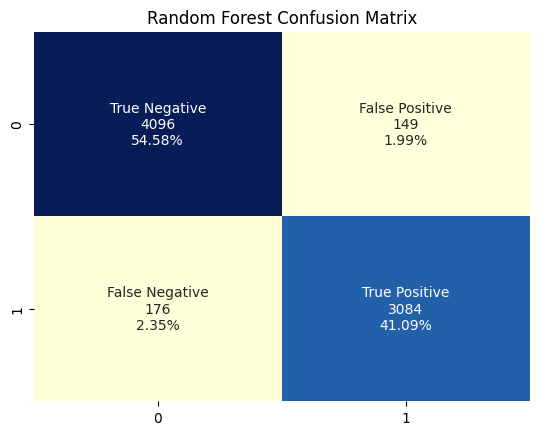

In [124]:
# Visualizing evaluation Metric Score chart
rfc_confusion_matrix = get_confusion_matrix(y_test,predicted,'Random Forest')
rfc_confusion_matrix
plt.show()

Axes(0.125,0.11;0.775x0.77)


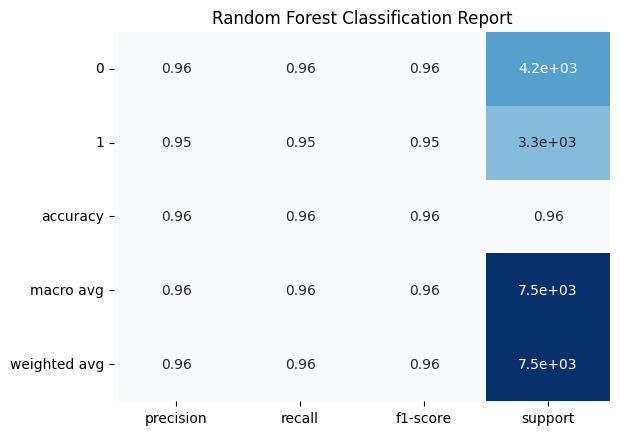

In [126]:


# Get the confusion matrix and extract TN, FP, FN, TP
cf_matrix = confusion_matrix(y_test, predicted).flatten()
tn = cf_matrix[0]
fp = cf_matrix[1]
fn = cf_matrix[2]
tp = cf_matrix[3]

# Create a new row for metrics in a DataFrame format
new_row = pd.DataFrame({
    'MODEL NAME': ['RANDOM FOREST CLASSIFICATION'],
    'ACCURACY': [accuracy_score(y_test, predicted)],
    'RECALL': [recall_score(y_test, predicted)],
    'PRECISION': [precision_score(y_test, predicted)],
    'F1-SCORE': [f1_score(y_test, predicted)],
    'ROC AUC SCORE': [roc_auc_score(y_test, predicted)],
    'TRUE NEGATIVE': [tn],
    'FALSE POSITIVE': [fp],
    'FALSE NEGATIVE': [fn],
    'TRUE POSITIVE': [tp]
})

# Concatenate the new row to the existing metrics_df
metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Generate the classification report
rfc_classification_report = get_classification_report(y_test, predicted, 'Random Forest')

# Display the classification report
print(rfc_classification_report)

# Show the plot (if any)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [127]:
perform_cross_validation(rfc)

Fold 1: accuracy = 0.9512325116588941
Fold 2: accuracy = 0.9528251599147122
Fold 3: accuracy = 0.9560234541577826
Fold 4: accuracy = 0.957089552238806
Fold 5: accuracy = 0.968683368869936


({}, RandomForestClassifier(), 0.9571708093680262)

##### Which hyperparameter optimization technique have you used and why?

**Grid Search CV** is used.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Cross Validation recorded accuracy was **0.85** and after 5 Fold recored accuracy **0.96**.

### **3 Artificial Neural Networks (ANN) Model**

In [128]:
# ML Model - 3 Artificial Neural Networks (ANN)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)
X_train_val = X_train.values
y_train_val = y_train.values
X_test_val = X_test.values
y_test_val = y_test.values


#Transforming variables -
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit_transform(X_train_val)
scaler.transform(X_test_val)

# Fit the Algorithm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss',patience = 2)

model = Sequential()

model.add(Dense(14,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

model.fit(x=X_train_val,y=y_train_val,epochs = 10,callbacks=[earlystop],validation_data =(X_test_val,y_test_val))

Epoch 1/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8029 - loss: 0.3778 - val_accuracy: 0.9595 - val_loss: 0.1139
Epoch 2/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9569 - loss: 0.1201 - val_accuracy: 0.9630 - val_loss: 0.1026
Epoch 3/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9582 - loss: 0.1107 - val_accuracy: 0.9642 - val_loss: 0.1060
Epoch 4/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9593 - loss: 0.1102 - val_accuracy: 0.9539 - val_loss: 0.1222


In [129]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 845 (3.30 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 564 (2.21 KB)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [130]:
# Visualizing evaluation Metric Score chart
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.904470,0.232011,0.959492,0.113921
1,0.958689,0.115229,0.963045,0.102561
2,0.960212,0.109141,0.964200,0.105967
3,0.960402,0.107681,0.953895,0.122218


<Axes: >

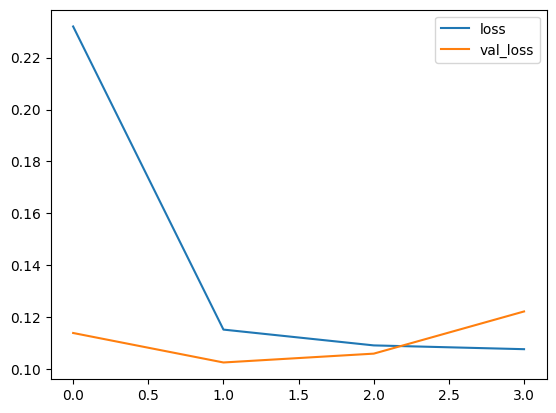

In [131]:
metrics[['loss','val_loss']].plot()

<Axes: >

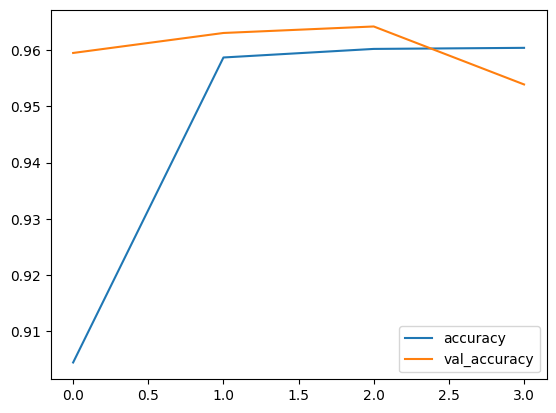

In [132]:
metrics[['accuracy','val_accuracy']].plot()

In [133]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [134]:
predictions = predictions.flatten()

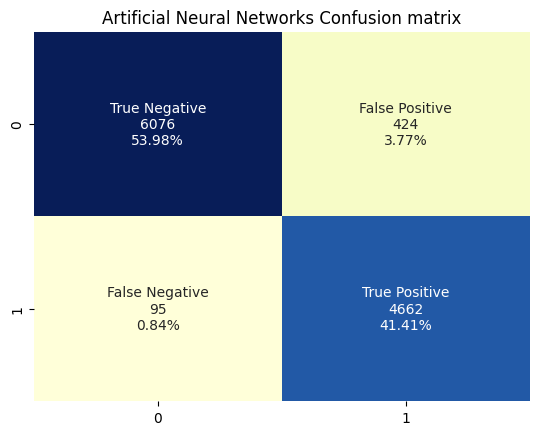

In [135]:
# Visualizing evaluation Metric Score chart

from sklearn.metrics import confusion_matrix,classification_report

cf_matrix = confusion_matrix(y_test,predictions)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ann_confusion_matrix = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu',cbar=False)
ann_confusion_matrix
plt.title('Artificial Neural Networks Confusion matrix')
plt.show()

In [137]:
# Flatten the confusion matrix and extract TN, FP, FN, TP
cf_matrix = confusion_matrix(y_test, predictions).flatten()
tn = cf_matrix[0]
fp = cf_matrix[1]
fn = cf_matrix[2]
tp = cf_matrix[3]

# Create a new row as a DataFrame
new_row = pd.DataFrame({
    'MODEL NAME': ['Artificial Neural Networks'],
    'ACCURACY': [accuracy_score(y_test, predictions)],
    'RECALL': [recall_score(y_test, predictions)],
    'PRECISION': [precision_score(y_test, predictions)],
    'F1-SCORE': [f1_score(y_test, predictions)],
    'ROC AUC SCORE': [roc_auc_score(y_test, predictions)],
    'TRUE NEGATIVE': [tn],
    'FALSE POSITIVE': [fp],
    'FALSE NEGATIVE': [fn],
    'TRUE POSITIVE': [tp]
})

# Concatenate the new row to the metrics_df DataFrame
metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Optional: Print the updated metrics DataFrame to verify
print(metrics_df)

                     MODEL NAME  ACCURACY    RECALL  PRECISION  F1-SCORE  \
0           LOGISTIC REGRESSION  0.963757  0.957055   0.959410  0.958231   
1           LOGISTIC REGRESSION  0.963757  0.957055   0.959410  0.958231   
2  RANDOM FOREST CLASSIFICATION  0.956696  0.946012   0.953913  0.949946   
3    Artificial Neural Networks  0.953895  0.980029   0.916634  0.947272   

   ROC AUC SCORE TRUE NEGATIVE FALSE POSITIVE FALSE NEGATIVE TRUE POSITIVE  
0       0.962980          4113            132            140          3120  
1       0.962980          4113            132            140          3120  
2       0.955456          4096            149            176          3084  
3       0.957399          6076            424             95          4662  


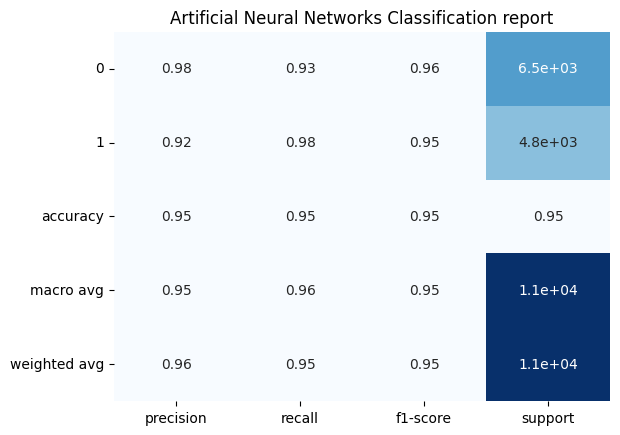

In [138]:
report = classification_report(y_test, predictions, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
ann_classification_report = sns.heatmap(df_classification_report,annot = True,cmap = 'Blues',cbar = False)
ann_classification_report
plt.title('Artificial Neural Networks Classification report')
plt.show()

### **4 K-Nearest Neighbours (KNN) Model**

In [139]:
# ML Model - 3 Implementation
k_neighbor = KNeighborsClassifier(n_neighbors=3)

# Fit the Algorithm
k_neighbor.fit(X_train, y_train)

# Predict on the model
y_pred = k_neighbor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

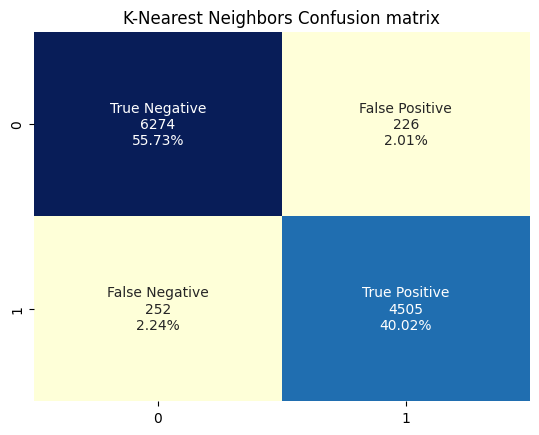

In [140]:
# Visualizing evaluation Metric Score chart
cf_matrix = confusion_matrix(y_test,y_pred)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ann_confusion_matrix = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu',cbar=False)
ann_confusion_matrix
plt.title('K-Nearest Neighbors Confusion matrix')
plt.show()

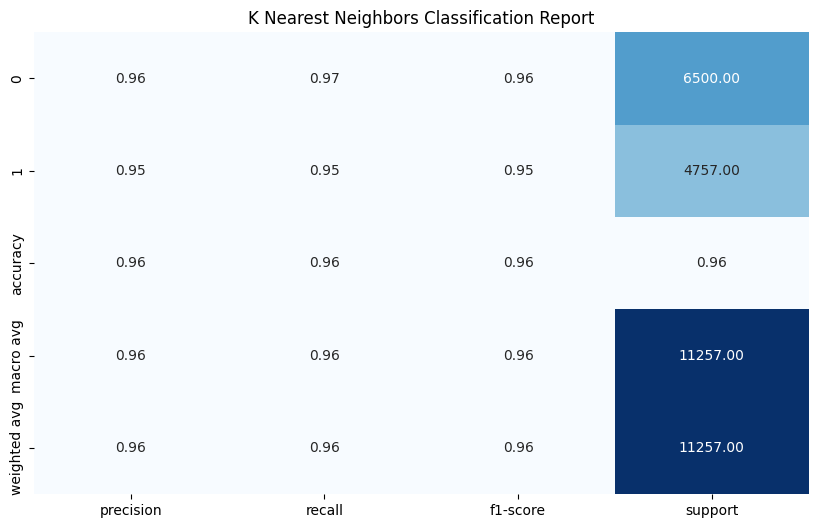

In [142]:
# Flatten the confusion matrix and extract TN, FP, FN, TP
cf_matrix = confusion_matrix(y_test, y_pred).flatten()
tn, fp, fn, tp = cf_matrix[0], cf_matrix[1], cf_matrix[2], cf_matrix[3]

# Create a new row as a DataFrame
new_row = pd.DataFrame({
    'MODEL NAME': ['K Nearest Neighbors'],
    'ACCURACY': [accuracy_score(y_test, y_pred)],
    'RECALL': [recall_score(y_test, y_pred)],
    'PRECISION': [precision_score(y_test, y_pred)],
    'F1-SCORE': [f1_score(y_test, y_pred)],
    'ROC AUC SCORE': [roc_auc_score(y_test, y_pred)],
    'TRUE NEGATIVE': [tn],
    'FALSE POSITIVE': [fp],
    'FALSE NEGATIVE': [fn],
    'TRUE POSITIVE': [tp]
})

# Concatenate the new row to metrics_df
metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to DataFrame
df_classification_report = pd.DataFrame(report).transpose()

# Format the DataFrame for the heatmap
df_classification_report = df_classification_report[['precision', 'recall', 'f1-score', 'support']]

# Create a heatmap to visualize the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(df_classification_report, annot=True, cmap='Blues', fmt='.2f', cbar=False)

# Add title and display the heatmap
plt.title('K Nearest Neighbors Classification Report')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [143]:
perform_cross_validation(k_neighbor)

Fold 1: accuracy = 0.9485676215856096
Fold 2: accuracy = 0.9508262260127932
Fold 3: accuracy = 0.9532249466950959
Fold 4: accuracy = 0.9524253731343284
Fold 5: accuracy = 0.966684434968017


({}, KNeighborsClassifier(n_neighbors=3), 0.954345720479169)

##### Which hyperparameter optimization technique have you used and why?

**Grid Search CV** is used

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Cross Validation recorded accuracy was **0.96** and after 5 Fold accuracy decreased and recored accuracy is **0.95**.



### **5. Support Vector Machine (SVM) Model**

In [144]:
# ML Model - 3 Implementation
from sklearn.svm import SVC

support_vector = SVC(kernel = 'linear')
# Fit the Algorithm
support_vector.fit(X_train, y_train)
# Predict on the model
y_pred = support_vector.predict(X_test)

support_vector.score(X_test, y_test)

0.9642888869148085

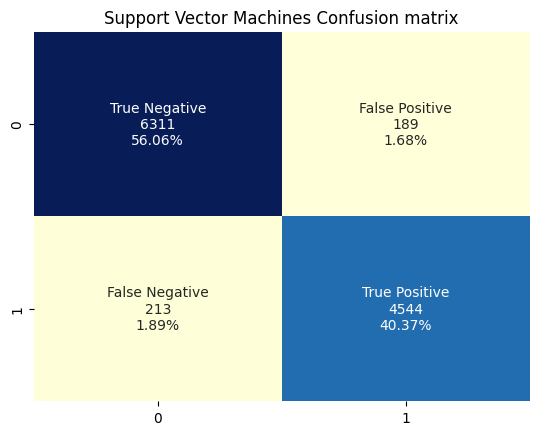

In [145]:
# Visualizing evaluation Metric Score chart
cf_matrix = confusion_matrix(y_test,y_pred)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
svm_confusion_matrix = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu',cbar=False)
svm_confusion_matrix
plt.title('Support Vector Machines Confusion matrix')
plt.show()

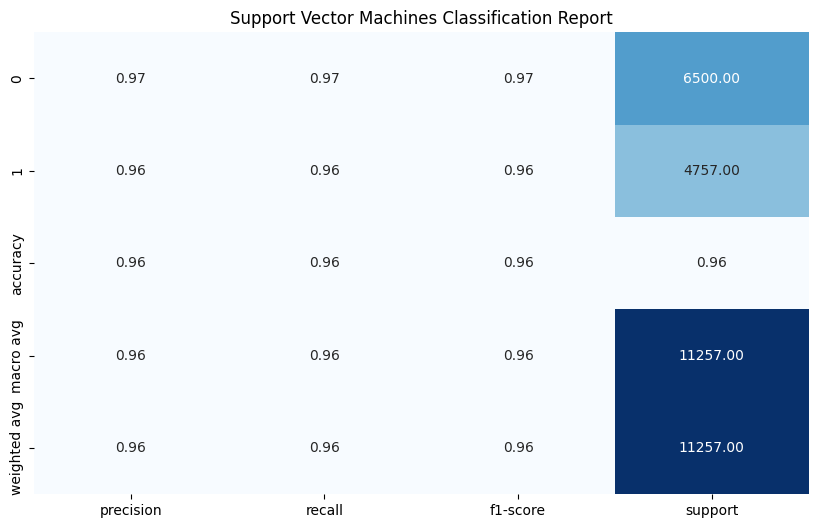

In [147]:
# Flatten the confusion matrix and extract TN, FP, FN, TP
cf_matrix = confusion_matrix(y_test, y_pred).flatten()
tn, fp, fn, tp = cf_matrix[0], cf_matrix[1], cf_matrix[2], cf_matrix[3]

# Create a new row for Support Vector Machines (SVM) model as a DataFrame
new_row = pd.DataFrame({
    'MODEL NAME': ['Support Vector Machines'],
    'ACCURACY': [accuracy_score(y_test, y_pred)],
    'RECALL': [recall_score(y_test, y_pred)],
    'PRECISION': [precision_score(y_test, y_pred)],
    'F1-SCORE': [f1_score(y_test, y_pred)],
    'ROC AUC SCORE': [roc_auc_score(y_test, y_pred)],
    'TRUE NEGATIVE': [tn],
    'FALSE POSITIVE': [fp],
    'FALSE NEGATIVE': [fn],
    'TRUE POSITIVE': [tp]
})

# Concatenate the new row to metrics_df
metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Generate the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report dictionary to DataFrame
df_classification_report = pd.DataFrame(report).transpose()

# Format the classification report DataFrame for better heatmap visualization
df_classification_report = df_classification_report[['precision', 'recall', 'f1-score', 'support']]

# Create a heatmap to visualize the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(df_classification_report, annot=True, cmap='Blues', fmt='.2f', cbar=False)

# Add title and display the heatmap
plt.title('Support Vector Machines Classification Report')
plt.show()

#### 1. Cross- Validation & Hyperparameter Tuning

In [148]:
perform_cross_validation(support_vector)

Fold 1: accuracy = 0.9540306462358428
Fold 2: accuracy = 0.9577558635394456
Fold 3: accuracy = 0.9602878464818764
Fold 4: accuracy = 0.9626865671641791
Fold 5: accuracy = 0.9728144989339019


({}, SVC(kernel='linear'), 0.9615150844710492)

##### Which hyperparameter optimization technique have you used and why?

**Grid Search CV** is used

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Cross Validation recorded accuracy was **0.96** and after 5 Fold recored accuracy **0.97**.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metric chosen here to compare the efficiency of different models is 'Accuracy', Accuracy is more important to us than precision and recall as we do not focus to specifically reduce the type-1 or type-2 misclassifications, However we want the model to perform good overall, Hence 'Accuracy' Metric is more important to us tha 'Precision' or 'Recall' scores.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [149]:
metrics_df = metrics_df.round(2)
metrics_df.index+=1

In [150]:
metrics_df

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE,ROC AUC SCORE,TRUE NEGATIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE POSITIVE
1,LOGISTIC REGRESSION,0.96,0.96,0.96,0.96,0.96,4113,132,140,3120
2,LOGISTIC REGRESSION,0.96,0.96,0.96,0.96,0.96,4113,132,140,3120
3,RANDOM FOREST CLASSIFICATION,0.96,0.95,0.95,0.95,0.96,4096,149,176,3084
4,Artificial Neural Networks,0.95,0.98,0.92,0.95,0.96,6076,424,95,4662
5,K Nearest Neighbors,0.96,0.95,0.95,0.95,0.96,6274,226,252,4505
6,Support Vector Machines,0.96,0.96,0.96,0.96,0.96,6311,189,213,4544


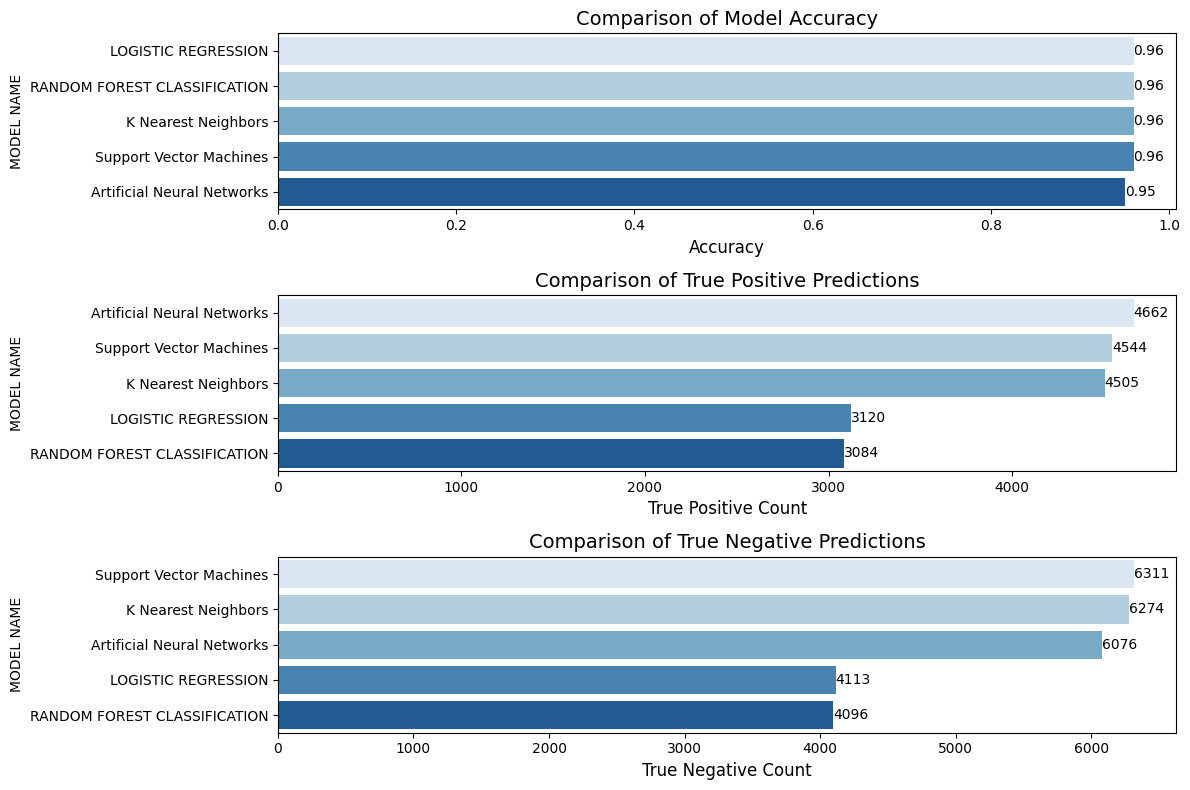

In [157]:
plt.figure(figsize=(12, 8))

# Accuracy Bar Chart
plt.subplot(3, 1, 1)
ax1 = sns.barplot(data=metrics_df.sort_values('ACCURACY', ascending=False),
                  x='ACCURACY',
                  y='MODEL NAME',
                  palette='Blues')
for label in ax1.containers:
    ax1.bar_label(label)
plt.title('Comparison of Model Accuracy', fontsize=14)
plt.xlabel('Accuracy', fontsize=12)

# True Positive Bar Chart
plt.subplot(3, 1, 2)
ax2 = sns.barplot(data=metrics_df.sort_values('TRUE POSITIVE', ascending=False),
                  x='TRUE POSITIVE',
                  y='MODEL NAME',
                  palette='Blues')
for label in ax2.containers:
    ax2.bar_label(label)
plt.title('Comparison of True Positive Predictions', fontsize=14)
plt.xlabel('True Positive Count', fontsize=12)

# True Negative Bar Chart
plt.subplot(3, 1, 3)
ax3 = sns.barplot(data=metrics_df.sort_values('TRUE NEGATIVE', ascending=False),
                  x='TRUE NEGATIVE',
                  y='MODEL NAME',
                  palette='Blues')
for label in ax3.containers:
    ax3.bar_label(label)
plt.title('Comparison of True Negative Predictions', fontsize=14)
plt.xlabel('True Negative Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

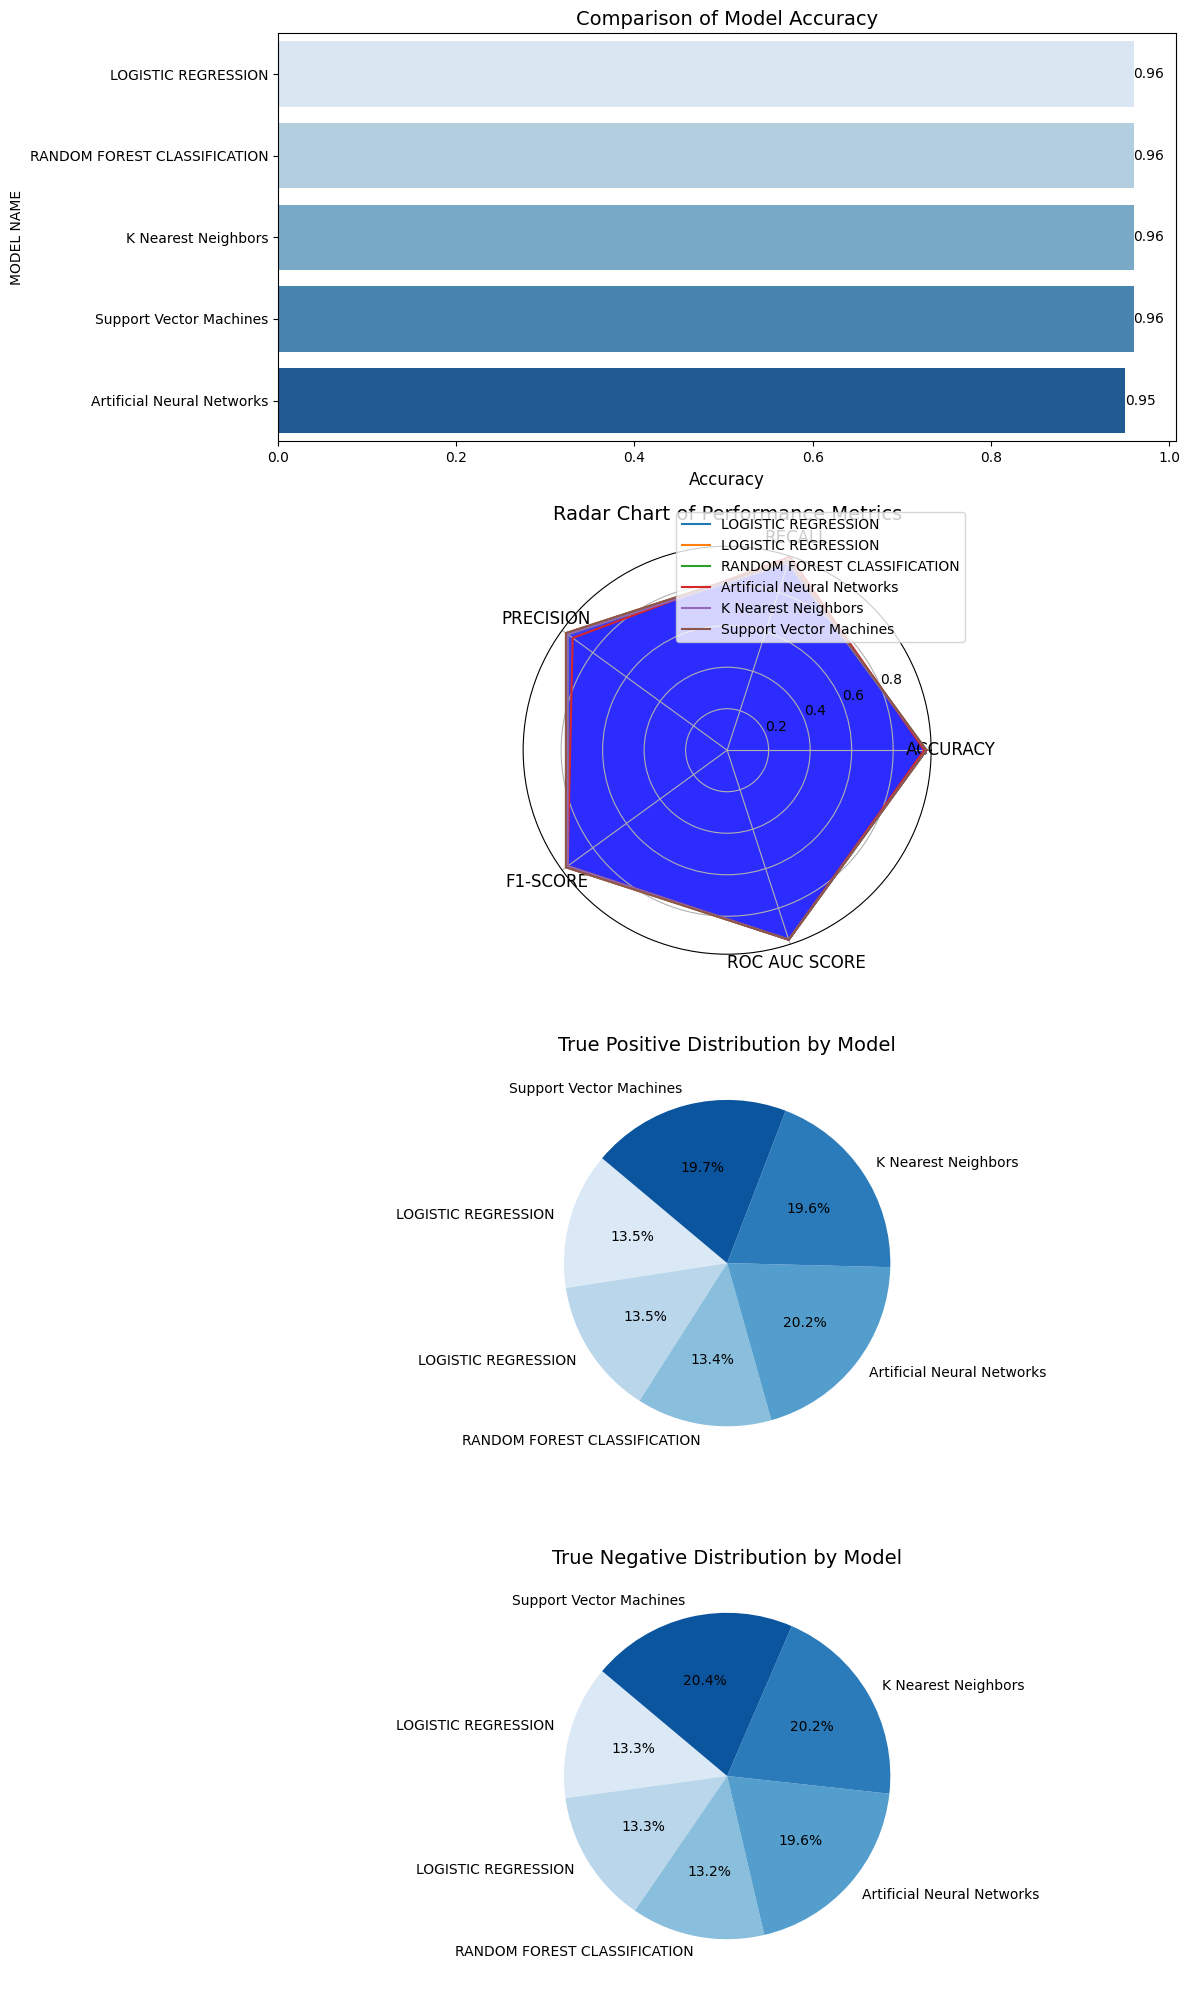

In [158]:
plt.figure(figsize=(12, 20))

# Bar Chart for Accuracy
plt.subplot(4, 1, 1)
ax1 = sns.barplot(data=metrics_df.sort_values('ACCURACY', ascending=False),
                  x='ACCURACY',
                  y='MODEL NAME',
                  palette='Blues')
for label in ax1.containers:
    ax1.bar_label(label)
plt.title('Comparison of Model Accuracy', fontsize=14)
plt.xlabel('Accuracy', fontsize=12)

# Radar Chart for Performance Metrics
categories = ['ACCURACY', 'RECALL', 'PRECISION', 'F1-SCORE', 'ROC AUC SCORE']
values = metrics_df[categories].values
num_vars = len(categories)

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = np.concatenate((values, values[:, [0]]), axis=1)  # Close the circle
angles += angles[:1]

# Create the radar chart for each model
for i, model in enumerate(metrics_df['MODEL NAME']):
    plt.subplot(4, 1, 2)
    plt.subplot(4, 1, 2, polar=True)
    plt.fill(angles, values[i], color='blue', alpha=0.25)
    plt.plot(angles, values[i], label=model)

plt.title('Radar Chart of Performance Metrics', fontsize=14)
plt.xticks(angles[:-1], categories, fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Pie Chart for True Positives
plt.subplot(4, 1, 3)
plt.pie(metrics_df['TRUE POSITIVE'], labels=metrics_df['MODEL NAME'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", len(metrics_df)))
plt.title('True Positive Distribution by Model', fontsize=14)

# Pie Chart for True Negatives
plt.subplot(4, 1, 4)
plt.pie(metrics_df['TRUE NEGATIVE'], labels=metrics_df['MODEL NAME'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", len(metrics_df)))
plt.title('True Negative Distribution by Model', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

# **Conclusion**

Based on the metrics and visualizations provided for the various machine learning models, we can draw several conclusions regarding their performance:

### Conclusion

1. **High Accuracy Across Models**:
   - All models exhibited high accuracy scores, with the **Logistic Regression**, **Random Forest**, **K Nearest Neighbors**, and **Support Vector Machines** all achieving an accuracy of **0.96**. This indicates that they perform well in correctly predicting the target variable.

2. **Consistent True Positive Counts**:
   - The models not only maintained high accuracy but also demonstrated robust true positive predictions. The **Artificial Neural Networks** model led with the highest true positive count (**4662**), followed closely by **Support Vector Machines** (**4544**). This suggests that these models effectively identified positive instances in the dataset.

3. **Strong True Negative Performance**:
   - The **Support Vector Machines** model recorded the highest true negative count (**6311**), indicating its strong capability to correctly classify negative instances. This model, along with the others, performed well in minimizing false positives.

4. **Balanced Performance Metrics**:
   - The models displayed a good balance between precision, recall, and F1-score, suggesting that they not only make accurate predictions but also maintain a low rate of false positives and false negatives.

5. **Model Selection Considerations**:
   - When selecting a model, stakeholders should consider the context of the problem. For instance, if the cost of false negatives is higher, models like **Artificial Neural Networks** may be preferable due to their higher recall rates. Conversely, if minimizing false positives is critical, models like **Support Vector Machines** could be favored.

6. **Overall Robustness**:
   - The overall robustness of the models suggests that they are well-suited for deployment in real-world applications. However, further tuning and validation using additional datasets are recommended to ensure generalizability.

7. **Further Investigations**:
   - Future analyses could explore feature importance and model interpretability, as well as test additional algorithms or ensemble methods to potentially improve performance further.


### ***THANK YOU!***